Автор:     Шестаков Михаил Сергеевич  
Telegram:  https://t.me/mshestakov1  
Телефон:   +7(950)035-55-38  
email:     mikhail-shestakov-2022@bk.ru  

# Исследование объявлений о продаже квартир

***Цель исследования:*** на основе данных сервиса Яндекс.Недвижимость определить основные параметры объекта недвижимости и степень их влияния на цену.  

***Описание данных***  
Исходные данные:  
Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

Таблица с исходными данными содержится в файле real_estate_data.csv.  
В таблице представлены следующие данные:   

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

***Содержание исследования:***  
1. [Общая информация о датафрейме](#dataframe_info)  
 1.1. [Чтение исходного файла](#read_file)  
 1.2. [Общая информация](#all_info)  
 1.3. [Гистограммы для всех параметров](#all_hist)  
            
2. [Предобработка данных](#preprocessing)  
 2.1. [Обработка пропущенных значений](#nan)  
 2.2. [Оптимизация типов данных](#types_change)  
 2.3. [Обработка неявных дубликатов среди наименований населенных пунктов](#duplicates)  
 2.4. [Обработка редких и выбивающихся значений](#rare_values)  
 
3. [Расчет и добавление в датафрейм дополнительных параметров](#new_parameters)  
4. [Исследовательский анализ данных](#eda)  
 4.1. [Исследование основных параметров объектов](#analisys_parameters)   
 4.2. [Сроки продажи квартир](#sale_time)  
 4.3. [Влияние основных параметров объектов на их цену](#parameters_cost)  
 4.4. [Анализ населенных пунктов с наибольшим числом объявлений](#big_cities)  
 4.5. [Анализ цен квартир в Санкт-Петербурге](#spb)  
5. [Общий вывод](#final)  

## Общая информация о датафрейме
<a id="dataframe_info"></a>

Импортируем библиотеки:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Чтение исходного файла
<a id="read_file"></a>

На основе файла с исходными данными создаем датафрейм:

In [2]:
try:
    df_start = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
except:
    df_start = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep="\t")

### Общая информация
<a id="all_info"></a>

In [3]:
print('Размер датафрейма:')
print(df_start.shape)
print('_' * 50)
print()
print('Общая информация о датафрейме:')
print(df_start.info(memory_usage='deep'))
print('_' * 50)
print()
print('Несколько строк датафрейма:')
display(df_start.sample(random_state=0, n=5))
print('_' * 50)
print()
print('Количество дубликатов:')
print(df_start.duplicated().sum())
print('_' * 50)  
print()
print('Описательная статистика строковых значений:')
display(df_start.describe(include=['object']).T)
print('_' * 50)
print()
print('Описательная статистика числовых значений:')
display(df_start.describe().T)
print('_' * 50)
print()
print('Уникальные названия населенных пунктов:')
display(df_start['locality_name'].unique())

Размер датафрейма:
(23699, 22)
__________________________________________________

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4631,2,7570000.0,67.00,2017-11-10T00:00:00,2,NaN,25.0,29.00,2,NaN,...,18.00,2.0,Санкт-Петербург,7711.0,13845.0,1.0,1326.0,0.0,NaN,60.0
17913,15,2490000.0,30.20,2018-11-06T00:00:00,1,2.5,5.0,16.60,5,NaN,...,5.50,NaN,Кронштадт,67816.0,49542.0,2.0,445.0,2.0,387.0,32.0
21278,8,2850000.0,54.00,2016-01-26T00:00:00,2,NaN,5.0,32.00,5,NaN,...,9.00,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,467.0
22608,9,8580000.0,94.00,2017-11-02T00:00:00,4,2.8,6.0,61.35,2,NaN,...,10.43,NaN,Санкт-Петербург,22562.0,3828.0,0.0,NaN,1.0,627.0,52.0
2606,11,12000000.0,84.68,2017-06-19T00:00:00,2,NaN,9.0,45.40,8,NaN,...,16.40,0.0,Санкт-Петербург,32121.0,5080.0,0.0,NaN,3.0,457.0,127.0


__________________________________________________

Количество дубликатов:
0
__________________________________________________

Описательная статистика строковых значений:


,count,unique,top,freq
first_day_exposition,23699,1491,2018-02-01T00:00:00,368
is_apartment,2775,2,False,2725
locality_name,23650,364,Санкт-Петербург,15721


__________________________________________________

Описательная статистика числовых значений:


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


__________________________________________________

Уникальные названия населенных пунктов:


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Гистограммы для всех параметров
<a id="all_hist"></a>

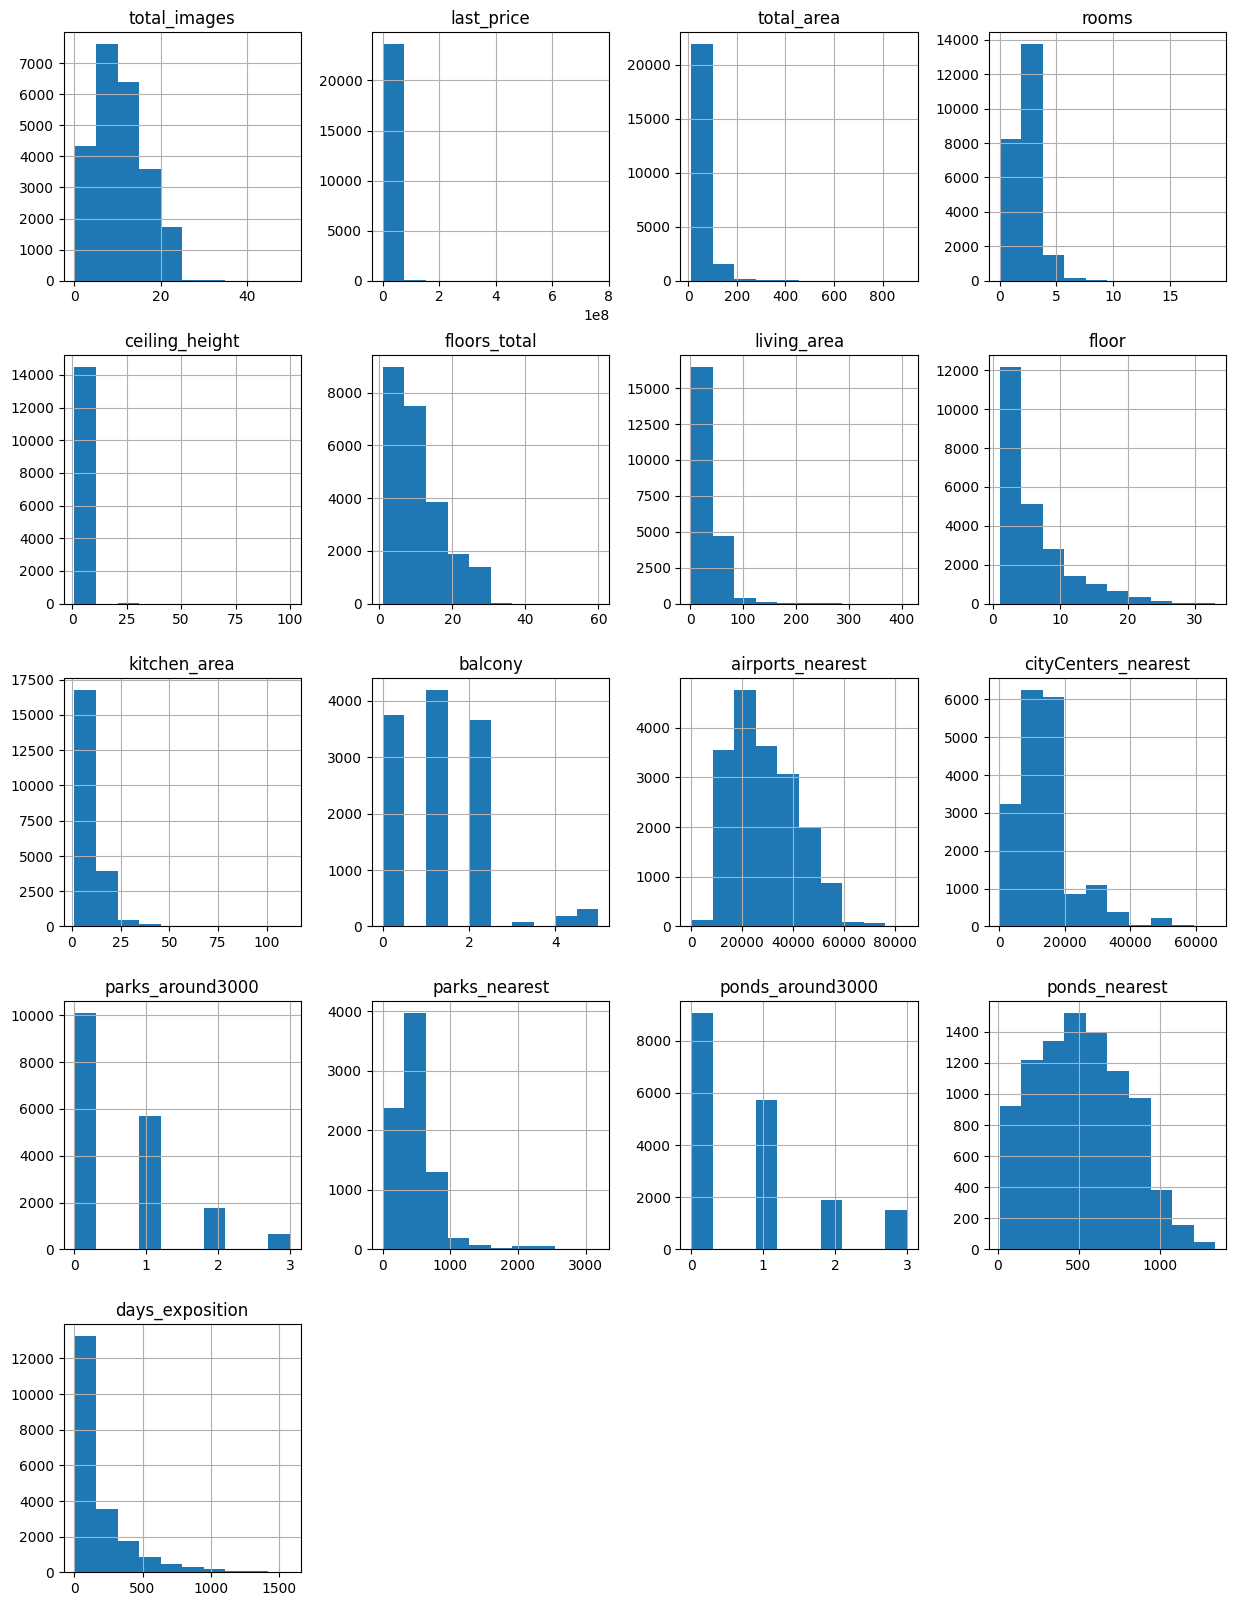

In [4]:
df_start.hist(figsize=(15, 20))
plt.show()

**Вывод**  
1. В таблице 23699 строк и 22 столбца. Данные имеют типы "int64", "float64", "object" и "bool". Для обработки таблицы требуется 8.1 MB памяти.
2. В столбце "last_price" максимальное значение (763000000) в 112 раз превышает значение третьей квартили (6800000), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
3. В столбце "total_area" максимальное значение (900) в 13 раз превышает значение третьей квартили (69,9), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
4. В столбце "ceiling_height" (высота потолков) присутствуют необъяснимо высокие значения: максимальное - 100. Причиной может быть как небрежность продавца при составлении объявления, так и технический сбой.
5. В столбце "locality_name" присутствуют неявные дубли.

## Предобработка данных
<a id="preprocessing"></a>

Создаем рабочую копию датафрейма:

In [5]:
df_work = df_start.copy(deep=True)

### Обработка пропущенных значений
<a id="nan"></a>

Определяем количество пропусков:

In [6]:
print('Количество пропусков:')
print(df_start.isna().sum())
print()
print('Количество пропусков в процентах:')
print(df_start.isna().mean()*100)  

Количество пропусков:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество пропусков в процентах:
total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.02987

1. В столбце "floors_total" (всего этажей в доме) пропущено 86 значений. Возможно, здания одноэтажные. Нужно сравнить с этажом помещения. Этажность дома - один из основных параметров выбора жилья, поэтому трудно предположить, что продавец осознанно его ну указал. Можно предположить, данные утеряны в процессе выгрузки.
2. В столбце "living_area" (жилая площадь в квадратных метрах) пропущено 1903 значений. Можно предположить, что продавец считает достаточным указать общую площадь и количество комнат, из чего покупатель может составить представление о жилой площади. Заменяем пропуски медианами, рассчитанными в зависимости от общей площади и количества комнат.
3. В столбце "is_apartment" (апартаменты) пропущено 20924 значений. Можно предположить, что пропуски приходятся на объекты, которые не являются апартаментами. Заменяем тип на "bool", а пропуски на "False".
4. В столбце "kitchen_area" (площадь кухни) пропущено 2278 значений. Заменяем пропуски медианами, рассчитанными в зависимости от общей площади и количества комнат.
5. В столбце "ceiling_height" (площадь кухни) пропущено 9195 значений. Заменяем пропуски медианами, рассчитанными в зависимости от общей площади и количества комнат.
6. В столбце "balcony" (число балконов) пропущено 11519 значений. Можно предположить, что значения не указаны для объектов, не имеющих балконов. Пропущенные значения стоит заменить на "0".
7. В столбце "locality_name" (название населённого пункта) пропущено 49 значений.
8. В столбце "airports_nearest" (расстояние до ближайшего аэропорта) пропущено 5542 значения. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или аэропорта. Возможен также сбой при выгрузке данных.
9. В столбце "cityCenters_nearest" (расстояние до центра города) пропущено 5519 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или центра города. Возможен также сбой при выгрузке данных.
10. В столбце "parks_around3000" (число парков в радиусе 3 км) пропущено 5518 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или парка. Возможен также сбой при выгрузке данных.
11. В столбце "parks_nearest" (расстояние до ближайшего парка) пропущено 15620 значения. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или парка. Возможен также сбой при выгрузке данных.
12. В столбце "ponds_around3000" (число водоёмов в радиусе 3 км) пропущено 5518 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или водоемов. Возможен также сбой при выгрузке данных.
13. В столбце "ponds_nearest" (расстояние до ближайшего водоёма) пропущено 14589 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или водоема. Возможен также сбой при выгрузке данных.
14. В столбце "days_exposition" (сколько дней было размещено объявление) пропущено 3181 значения. Данные о продолжительности размещения объявления хранится в системе рекламной площадки. Потеря значений может быть связано только с техническим сбоем, в том числе при выгрузке данных. Поскольку удаление соответствующих объектов из таблицы лишит исследование 13% данных, целесообразно оставить значения без изменений.

**Пропущенные значения "ceiling_height" (высота потолка), "living_area" (жилая площадь) и "kitchen_area"(площадь кухни)**

Заменяем пропуски "ceiling_height", "living_area" и "kitchen_area" медианами соответствующих параметров, рассчитанными в зависимости от общей площади и количества комнат. Необработанные пропуски заменяем на "-1":

In [7]:
def field_median(field):
    global df_work
    field_isna = df_work[field].isna().sum()                            # количество пустых ячеек до обработки
    for i in total_area_unique:                         # проходим циклом по списку уникальных значений столбца "total_area"
        for j in rooms_unique:                          # проходим циклом по списку уникальных значений столбца "rooms"
            # заменяем пропуски 'ceiling_height' на медианы
            df_work.loc[(df_work[field].isna()) &
                        (df_work['rooms'] == j) &
                        (df_work['total_area'].round() == i), field] =\
            df_work.loc[(df_work[field].notna()) &
                        (df_work['rooms'] == j) &
                        (df_work['total_area'].round() == i), field].median()
            
    df_work.loc[df_work[field].isna(), field] = -1         # Оставшиеся пропуски заменяем на "-1"
    
    print('Для {} обработано {} пропусков.'.format(field, field_isna - df_work[field].isna().sum()))
    return(df_work)

In [8]:
rooms_unique = df_work['rooms'].unique()                            # список уникальных значений столбца "rooms"
total_area_unique = df_work['total_area'].round().unique()          # список уникальных значений столбца "total_area"

for i in ['ceiling_height', 'living_area', 'kitchen_area']:         # проходим циклом по обрабатываемым столбцам
    df_work = field_median(i)

Для ceiling_height обработано 9195 пропусков.
Для living_area обработано 1903 пропусков.
Для kitchen_area обработано 2278 пропусков.


**Пропущенные значения "floors_total" (всего этажей в доме)**

Если этажность здания не указана, а этаж квартиры "1", то заменяем пропуск этажности здания на "1". Прочие пропущенные значения заменяем на "-1":

In [9]:
floors_total_isna = df_work['floors_total'].isna().sum()                       # количество пустых ячеек до обработки

# если не указана этажность здания, но этаж квартиры 1, заменяем пропуск этажности здания на 1
df_work.loc[(df_work['floors_total'].isna()) & (df_work['floor'] == 1), 'floors_total'] = 1

# Оставшиеся пропуски заменяем на "-1"
df_work['floors_total'] = df_work['floors_total'].where(df_work['floors_total'].notna(), -1)

print('Из таблицы удалено {} строк, для которых не указана этажность здания.'
      .format(floors_total_isna - df_work['floors_total'].isna().sum()))

Из таблицы удалено 86 строк, для которых не указана этажность здания.


**Пропущенные значения "balcony", "is_apartment", "parks_around3000", "ponds_around3000"**

Заменяем пропущенные значения на "0".

In [10]:
df_work[['balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000']] = (
    df_work[['balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000']].fillna(0)
)

**Пропущенные значения "locality_name" (название населённого пункта)**

Пропущенные значения заменяем на "Отсутствует":

In [11]:
df_work.loc[df_work['locality_name'].isna(), 'locality_name'] = 'Отсутствует'

### Оптимизация типов данных
<a id="types_change"></a>

**Изменение типов "total_images", "rooms", "balcony", "parks_around3000", "ponds_around3000", "floors_total" и "floor"**

Данные столбцов "total_images", "rooms", "balcony", "parks_around3000", "ponds_around3000", "floors_total" и "floor" имеют тип "int64" (размер числа - 8 байт). Поскольку значения целочисленные, положительные и попадают в диапазон 0 - 255, целесообразно заменить тип на "uint8" (размер числа - 1 байт).  
Изменяем тип данных столбцов "total_images", "rooms" и "floor":

In [12]:
try:
    df_work = df_work.astype({'total_images' : 'uint8', 'rooms' : 'uint8', 'balcony' : 'uint8', 'parks_around3000' : 'uint8',
                              'ponds_around3000' : 'uint8', 'floors_total' : 'uint8', 'floor' : 'uint8'})
except:
    print('Некорректный тип данных')

**Изменение типа "last_price" (конечная цена)**

Значения "last_price" - вещественные, имеют тип "float64". Переводим их в целочисленные. Поскольку значения укладываются в диапазон 0-4294967295, заменяем тип на "uint32" (размер числа - 4 байт):

In [13]:
try:
    df_work['last_price'] = df_work['last_price'].astype('uint32')
except:
    print('Некорректный тип данных')

**Изменение типа "is_apartment" (апартаменты)**

Изменяем тип данных на "bool":

In [14]:
df_work['is_apartment'] = df_work['is_apartment'].astype('bool')                        #меняем тип поля на "bool"

### Обработка неявных дубликатов среди наименований населенных пунктов
<a id="duplicates"></a>

Добавляем в таблицу столбец с очищенными от неявных дубликатов значениями столбца "locality_name".

In [15]:
def locality_klass(locality):                      
    locality_list = locality.split()                  # разделяем строки названий городов на слова
    letter_list=[]                                    # список, в который будем складывать результаты
    for i in range(len(locality_list)):               # перебираем отдельные слова из названий городов
        if not locality_list[i].islower():            # если в слове есть заглавные буквы
            letters = []                              # словарь, в который будем складывать символы
            for j in locality_list[i]:                # проходимся по каждому символу
                if j == 'Ё':                          # заменяем Ё на Е
                    j = 'Е'
                elif j == 'ё':
                    j = 'е'
                letters.append(j)                     # добавляем символы в список
            word = ''.join(letters)                   # объединяем список в слово
            letter_list.append(word)                  # добавляем слово в список
    return ' '.join(letter_list)                      # объединяем список в строку и возвращаем ее
df_work['locality_name_unique'] = df_work['locality_name'].apply(locality_klass).astype('category')

### Обработка редких и выбивающихся значений
<a id="rare_values"></a>

**Обработка "ceiling_height"**

Выводим уникальные значения:

In [16]:
df_work['ceiling_height'].unique()

array([  2.7  ,   2.65 ,   3.   ,   3.03 ,   2.5  ,   2.6  ,   2.8  ,
         2.55 ,   2.67 ,   2.56 ,   3.05 ,   2.75 ,   3.035,   2.9  ,
         3.125,   3.2  ,   2.745,   2.61 ,   3.37 ,   2.76 ,   3.25 ,
         3.45 ,   2.77 ,   2.85 ,   2.64 ,   2.57 ,   4.15 ,   3.5  ,
         2.775,   3.3  ,   2.71 ,   4.   ,   2.47 ,   2.91 ,   2.73 ,
         2.84 ,   3.1  ,   3.12 ,   3.06 ,   2.34 ,   3.4  ,   2.58 ,
         2.675,   2.72 ,  -1.   ,   2.54 ,   2.51 ,   2.78 ,   2.925,
        25.   ,   3.7  ,   2.77 ,   2.52 ,   2.95 ,   5.2  ,   2.56 ,
         2.68 ,   2.87 ,   2.66 ,   2.625,   2.59 ,   2.   ,   2.535,
         2.805,   2.45 ,   3.6  ,   2.92 ,   3.11 ,   3.145,   2.775,
         3.13 ,   2.725,   2.85 ,   3.8  ,   3.15 ,   3.55 ,   3.29 ,
         3.16 ,   3.62 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   3.135,
         5.3  ,   5.   ,   2.79 ,   2.715,   4.06 ,   2.94 ,   2.62 ,
         3.82 ,   3.54 ,   3.53 ,   2.83 ,   3.15 ,   4.7  ,   2.94 ,
         2.4  ,   3.

Согласно СНиП 31-01-2003 минимальная высота потолка в жилом помещении - 2,5 метра.  
Максимальная высота - до 4 метров в "сталинках".  
Предполагаем, что для объектов, у которых значения больше 10, параметр заполнен некорректно, то есть, например, 25 м - это на самом деле 2,5 м. Делим такие значения на 10. Объектам с высотой потолков меньше 2,5 м и больше 4,0 м присваиваем значение "-1".

In [17]:
df_work['ceiling_height'] = (
    df_work['ceiling_height']
        .where(df_work['ceiling_height'] < 10, df_work['ceiling_height'] / 10).round(1)
        .where((df_work['ceiling_height'] >= 2.5) & (df_work['ceiling_height'] <= 4), -1)
)

**Обработка "floors_total"**

Выводим уникальные значения:

In [18]:
df_work['floors_total'].unique()

array([ 16,  11,   5,  14,  12,  26,  24,  27,   9,   6,  17,  25,   3,
        23,  19,  18,   4,  22,   8,   2,  10,   7,  13,  15, 255,   1,
        20,  28,  36,  21,  35,  34,  60,  29,  33,  52,  37], dtype=uint8)

В Северо-Западном регионе самое высокое жилое здание ЖК "Александр Невский" высотой в 37 этажей. Значения большей этажности заменяем на "-1":

In [19]:
df_work['floors_total'] = df_work['floors_total'].where((df_work['floors_total'] > 0) & (df_work['floors_total'] <= 37), -1)

**Обработка "floor"**

Выводим уникальные значения:

In [20]:
df_work['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=uint8)

Выбивающие значения отсутствуют. Оставляем без изменений.

**Обработка "total_images"**

Выводим уникальные значения:

In [21]:
df_work['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=uint8)

Выбивающие значения отсутствуют. Оставляем без изменений.

**Обработка "balcony"**

Выводим уникальные значения:

In [22]:
df_work['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Максимальное количество балконов в Северо-Западном регионе - 3 на квартиру (5 жилых комплексов - "Чудеса света", "Созвездие", "Дюна", "Greenландия" и "Тридевяткино царство"). Для объектов, у которых количество балконов превышает 3, заменяем значение на "-1".

In [23]:
df_work['balcony'] = df_work['balcony'].where(df_work['balcony'] <= 3, -1)

**Удаление выбросов "last_price", "total_area", "rooms"**

Удаляем значения "0" и превышающие Q3+3*IQR.

In [24]:
parameters = {'last_price': 'Распределение цен',
              'total_area': 'Распределение общей площади',
              'rooms': 'Распределение по количеству комнат',
            }
parameters_x = {'last_price': 'Цена',
              'total_area': 'Общая площадь',
              'rooms': 'Количество комнат',
            }

last_price


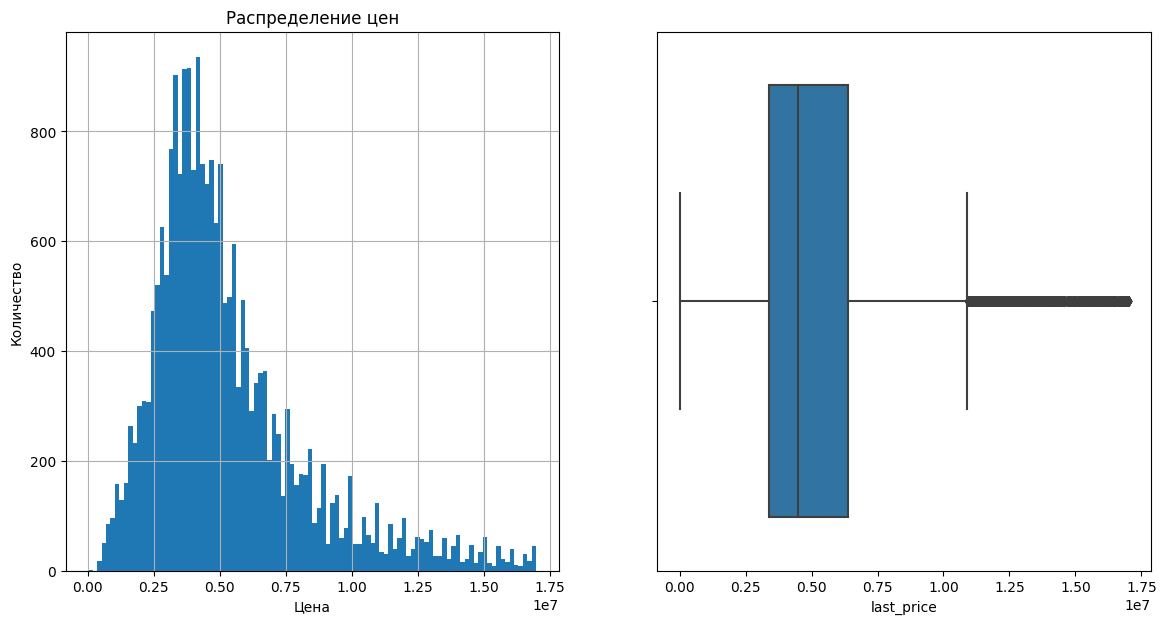

Удалено 943 строк.
Новая медиана = 4500000.0
Новое среднее = 5287100.738310775
Отношение новой медианы к исходной = 0.967741935483871
Отношение нового среднего к исходному = 0.8082337872804343
count    2.275600e+04
mean     5.287101e+06
std      2.941699e+06
min      1.219000e+04
25%      3.391750e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.700000e+07
Name: last_price, dtype: float64
__________________________________________

total_area


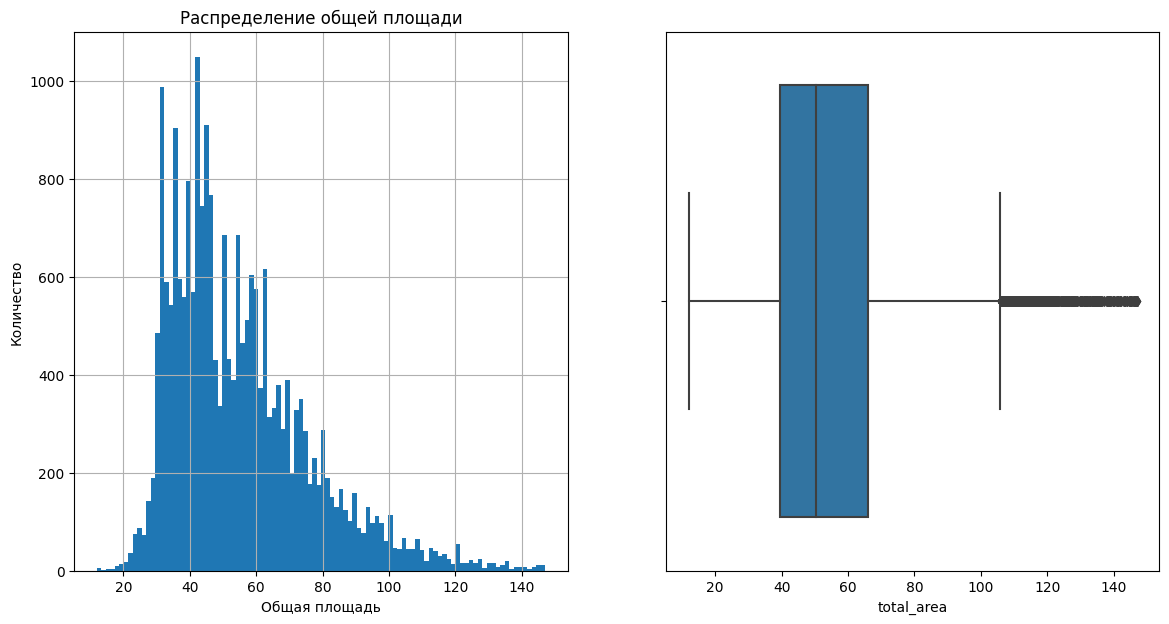

Удалено 154 строк.
Новая медиана = 50.4
Новое среднее = 55.15807273692594
Отношение новой медианы к исходной = 0.9692307692307692
Отношение нового среднего к исходному = 0.9139901526351549
count    22602.000000
mean        55.158073
std         21.027861
min         12.000000
25%         39.500000
50%         50.400000
75%         66.000000
max        147.000000
Name: total_area, dtype: float64
__________________________________________

rooms


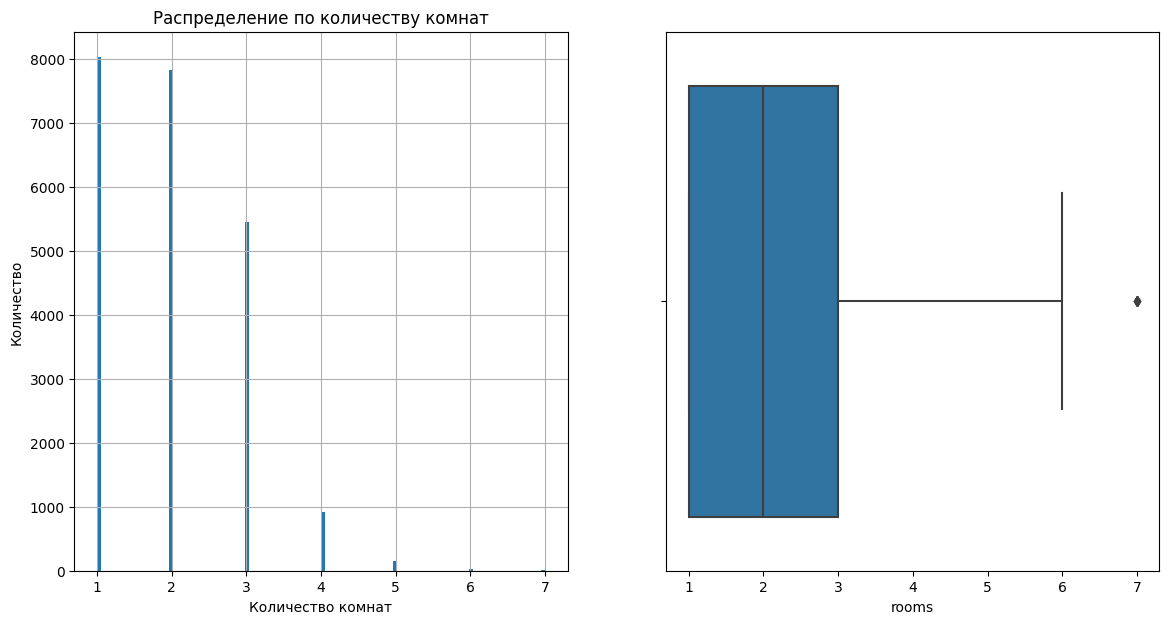

Удалено 196 строк.
Новая медиана = 2.0
Новое среднее = 1.9921895920735517
Отношение новой медианы к исходной = 1.0
Отношение нового среднего к исходному = 0.9621148749297177
count    22406.000000
mean         1.992190
std          0.920631
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
__________________________________________

Всего удалено 1293 строк.


In [25]:
del_all = 0                                                       # счетчик общего количества удаленных строк
for i in parameters:                                              # проходим по списку параметров
    del_quantity = len(df_work.index)                             # число строк в таблице
    q25 = df_work[i].quantile(0.25)                               # вычисляем 1-ую квантиль
    q75 = df_work[i].quantile(0.75)                               # вычисляем 3-ую квантиль                               
    maximum = q75 + 3 * (q75 - q25)                               # верхняя граница
    df_work = df_work.loc[(df_work[i] > 0) & (df_work[i] <= maximum)].reset_index(drop=True)    # убираем выбросы
    
    fig = plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = df_work[i].hist(bins=100)
    ax1.set_title(parameters.get(i))
    ax1.set_ylabel('Количество')
    ax1.set_xlabel(parameters_x.get(i))
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.boxplot(x=i, data=df_work)
    del_all += del_quantity - len(df_work.index)
    print(i)
    plt.show()
    print('Удалено {} строк.'.format(del_quantity - len(df_work.index)))
    print('Новая медиана = {}'.format(df_work[i].median()))
    print('Новое среднее = {}'.format(df_work[i].mean()))
    print('Отношение новой медианы к исходной = {}'.format(df_work[i].median() / df_start[i].median()))
    print('Отношение нового среднего к исходному = {}'.format(df_work[i].mean() / df_start[i].mean()))
    print(df_work[i].describe().T)
    print('__________________________________________')
    print()
print('Всего удалено {} строк.'.format(del_all)) 

In [26]:
print('Всего удалено {:.2%} строк'.format((df_start.shape[0]-df_work.shape[0]) / df_start.shape[0]))

Всего удалено 5.46% строк


Вывод:
1. Пропущенные значения "ceiling_height" (высота потолка), "living_area" (жилая площадь) и "kitchen_area" (площадь кухни) заменены медианами соответствующих параметров, рассчитанными в зависимости от общей площади и количества комнат.    
2. Пропущенные значения "balcony", "is_apartment", "parks_around3000", "ponds_around3000" заменены на "0".  
3. Пропущенные значения "airports_nearest" (расстояние до ближайшего аэропорта в метрах) заменены медианами, рассчитанными в зависимости от названия населенного пункта. Оставшиеся пропуски оставлены без изменений.  
4. Обработаны пропуски и выбивающиеся значения "ceiling_height" (высота потолка), "floors_total" (всего этажей), "balcony" (количество балконов).
5. Необработанные пропуски и выбивающиеся значения "ceiling_height", "balcony", "floors_total",  "living_area" и "kitchen_area" заменены на "-1".
6. Удалены выбросы "last_price" (цена на момент снятия с публикации), "total_area" (общая площадь квартиры), "rooms" (количество комнат).
7. В результате предобработки удалено 5.46% строк.  
8. Рассчитаны и добавлены в датафрейм:  
- средняя цена квадратного метра ("price_m");  
- дата публикации ("date_exposition");  
- день недели публикации ("dayofweek");  
- месяц публикации ("month");  
- год публикации ("year");  
- классификация этажей ("floor_class");  
- расстояние до центра города в километрах ("cityCenters_nearest_km").

## Расчет и добавление в датафрейм дополнительных параметров
<a id="new_parameters"></a>

**Средняя цена квадратного метра ("price_m")**

Добавляем в таблицу "good_df" столбец "price_m" , содержащий значения средней цены квадратного метра для каждого объекта, и назначаем тип "uint32" (так как значения укладываются в диапазон 0-4294967295, а дробная часть незначительна, чтобы учитывать ее в исследовании):

In [27]:
df_work['price_m'] = (df_work['last_price'] / df_work['total_area']).astype('uint32')

**Дата публикации ("date_exposition")**

Добавляем в таблицу "df_work" столбец "date_exposition", содержащий даты публикаций объявлений, приведенные к формату dd-mm-yyyy:

In [28]:
df_work['date_exposition'] = pd.to_datetime(df_work['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S').dt.strftime('%d-%m-%Y')

**День недели публикации ("dayofweek")**

Создаем в таблице столбец, куда заносим значения месяцев, в которые были опубликованы объявления:

In [29]:
df_work['dayofweek'] = pd.to_datetime(df_work['date_exposition']).dt.dayofweek

**Месяц публикации ("month")**

Создаем в таблице столбец, куда заносим значения месяцев, в которые были опубликованы объявления:

In [30]:
df_work['month'] = pd.to_datetime(df_work['date_exposition']).dt.month

**Год публикации ("year")**

Создаем в таблице столбец, куда заносим значения лет, в которые были опубликованы объявления:

In [31]:
df_work['year'] = pd.to_datetime(df_work['date_exposition']).dt.year

In [32]:
df_work

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m,date_exposition,dayofweek,month,year
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.7,16,51.00,8,False,...,482.0,2,755.0,NaN,Санкт-Петербург,120370,07-03-2019,2,7,2019
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.7,11,18.60,1,False,...,NaN,0,NaN,81.0,Шушары,82920,04-12-2018,3,4,2018
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.6,5,34.30,4,False,...,90.0,2,574.0,558.0,Санкт-Петербург,92785,20-08-2015,3,8,2015
3,2,10000000,100.00,2018-06-19T00:00:00,2,3.0,14,32.00,13,False,...,112.0,1,48.0,121.0,Санкт-Петербург,100000,19-06-2018,1,6,2018
4,10,2890000,30.40,2018-09-10T00:00:00,1,2.5,12,14.40,5,False,...,NaN,0,NaN,55.0,Янино-1,95065,10-09-2018,1,10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22401,9,9700000,133.81,2017-03-21T00:00:00,3,3.7,5,73.30,3,False,...,796.0,3,381.0,NaN,Санкт-Петербург,72490,21-03-2017,1,3,2017
22402,14,3100000,59.00,2018-01-15T00:00:00,3,2.5,5,38.00,4,False,...,NaN,0,NaN,45.0,Тосно,52542,15-01-2018,0,1,2018
22403,18,2500000,56.70,2018-02-11T00:00:00,2,2.7,3,29.70,1,False,...,NaN,0,NaN,NaN,Рождествено,44091,11-02-2018,4,11,2018
22404,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17,40.05,12,False,...,173.0,3,196.0,602.0,Санкт-Петербург,149511,28-03-2017,1,3,2017


**Классификация этажей ("floor_class")**

Назначить объектам классификацию по этажам: "Первый", "Последний", "Другой".  

In [33]:
df_work.loc[(df_work['floor'] == 1), 'floor_class'] = 'Первый'
df_work.loc[(df_work['floors_total'] != df_work['floor']) & (df_work['floor'] != 1), 'floor_class'] = 'Другой'
df_work.loc[(df_work['floors_total'] == df_work['floor']) & (df_work['floors_total'] != 1), 'floor_class'] = 'Последний'
df_work['floor_class'] = pd.Categorical(df_work['floor_class'], ['Первый', 'Другой', 'Последний'])

**Расстояние до центра города в километрах ("cityCenters_nearest_km")**

In [34]:
df_work['cityCenters_nearest_km'] = (df_work['cityCenters_nearest'] / 1000).round()

**Вывод:**  
Рассчитаны и добавлены в датафрейм следующие параметры:  
- средняя цена квадратного метра ("price_m");
- Дата публикации ("date_exposition");
- День недели публикации ("dayofweek");
- Месяц публикации ("month");
- Год публикации ("year");
- Классификация этажей ("floor_class").

## Исследовательский анализ данных
<a id="eda"></a>

### Исследование основных параметров объектов
<a id="analisys_parameters"></a>

Функция построения гистограмм:

In [35]:
field_list = {'total_area' : 'Общая площадь', 'living_area' : 'Жилая площадь', 'kithen_area' : 'Площадь кухни',
              'last_price' : 'Конечная цена, млн', 'rooms' : 'Количество комнат', 'ceiling_height' : 'Высота потолков',
              'floor' : 'Этаж', 'floor_class' : 'Класс этажа', 'floors_total' : 'Этажей в доме',
              'cityCenters_nearest' : 'Расстояние до центра', 'airports_nearest' : 'Расстояние до аэропорта',
              'parks_nearest' : 'Расстояние до парка', 'dayofweek' : 'День недели публикации объявления',
              'month' : 'Месяц публикации объявления', 'days_exposition' : 'Дней публикации объявления'}

def histogr(field):
    if min(df_work[field]) == -1:                         # если присутствуют отрицательные значения
        df_tmp = df_work.loc[df_work[field] >= 0]         # убираем отрицательные значения
    else:
        df_tmp = df_work
    plt.figure(figsize=(14,10))
    if field == 'last_price':
        df_tmp[field] = df_tmp[field] / 1000000
        ax = sns.histplot(data=df_tmp, x=field)
    else:
        ax = sns.histplot(data=df_tmp, x=field)
    plt.title(f'Распределение {field}')
    plt.xlabel(field_list.get(field))
    plt.ylabel('Количество')
    plt.show()

**Распределение объектов по общей площади ("total_area")**

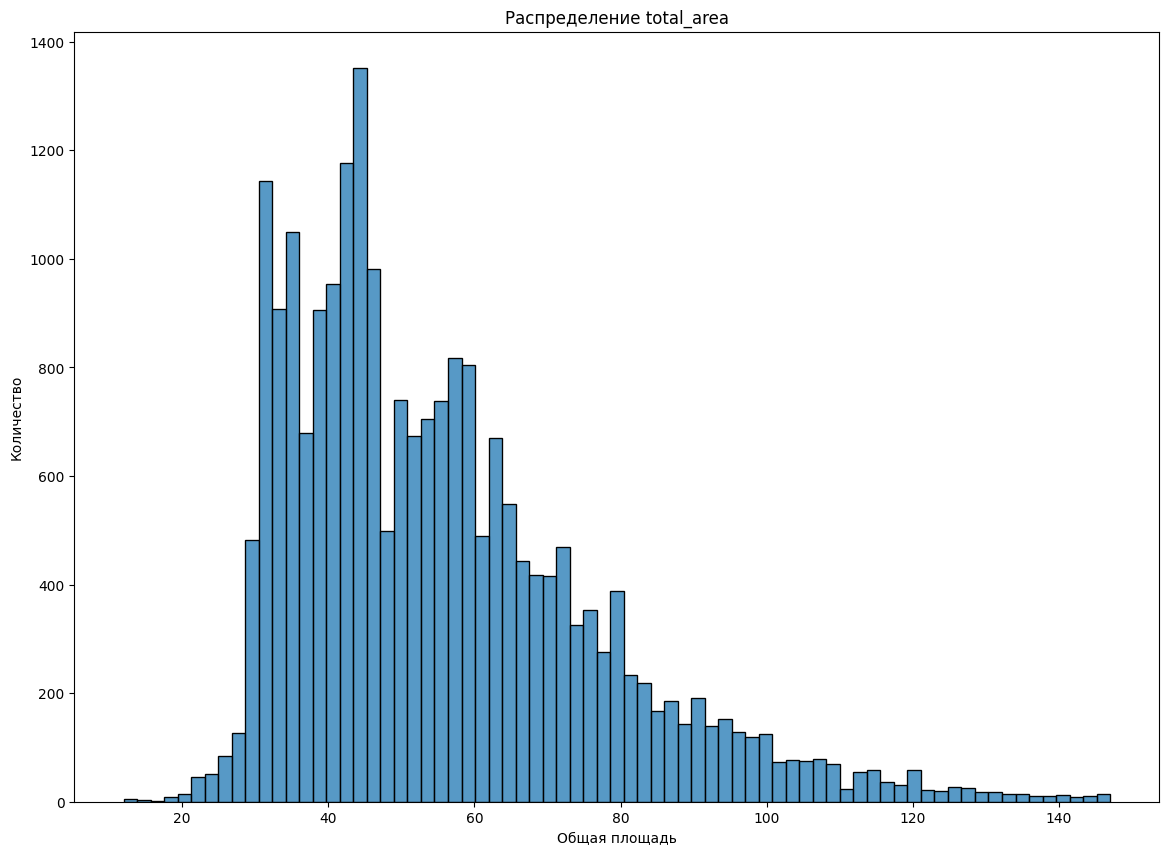

In [36]:
histogr('total_area')

Наибольшее количество выставленных на продажу объектов имеют площадь 30-64 кв.м.  
Количество объектов площадью до 30 кв.м. и более 100 кв.м. незначительно относительно общего числа.

**Распределение объектов по жилой площади ("living_area")**

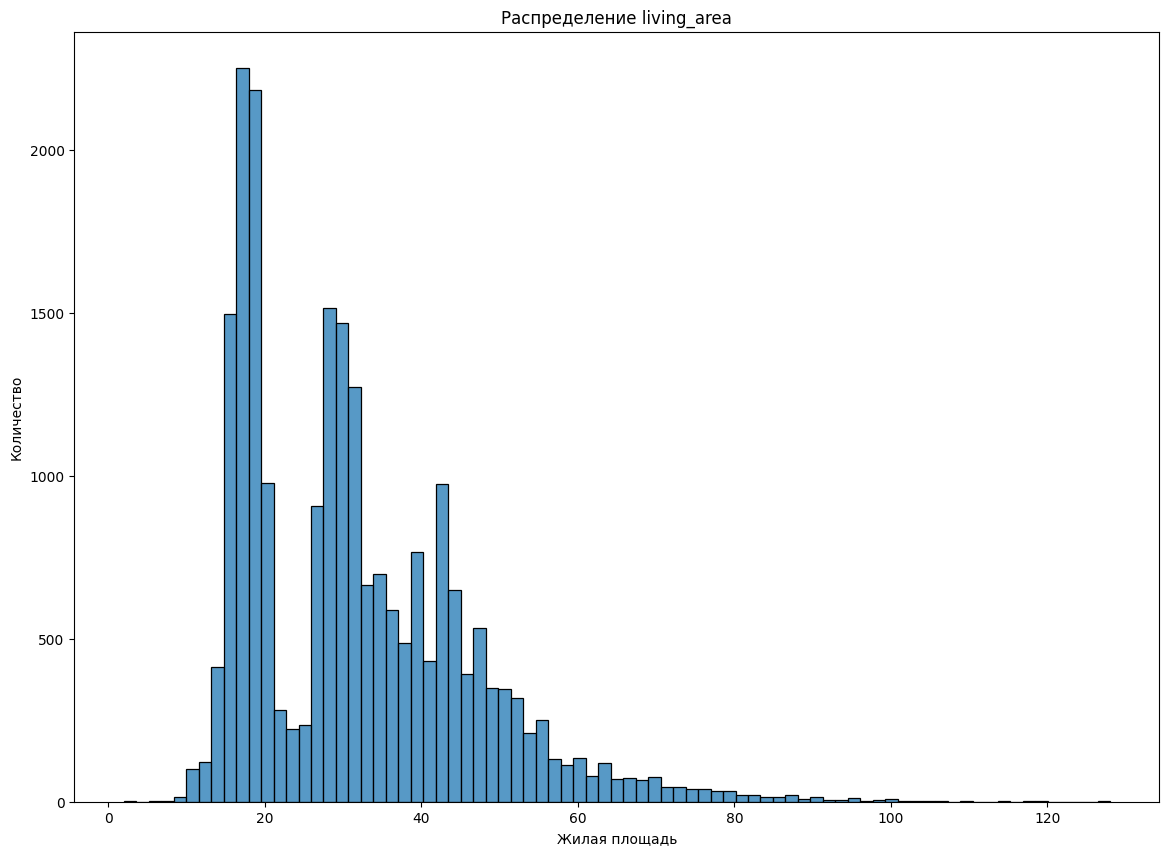

In [37]:
histogr('living_area')

Наибольшее количество выставленных на продажу объектов имеют жилую площадь 16-20 кв.м. или 26-30 кв.м.  
Количество объектов с жилой площадью до 16 кв.м. и более 56 кв.м. незначительно относительно общего числа.

**Распределение объектов по площади кухни ("kithen_area")**

In [38]:
df_work['kitchen_area'].value_counts()

6.00     1557
10.00    1328
9.00     1264
8.00     1184
7.00     1096
         ... 
7.78        1
7.12        1
15.72       1
13.73       1
16.74       1
Name: kitchen_area, Length: 876, dtype: int64

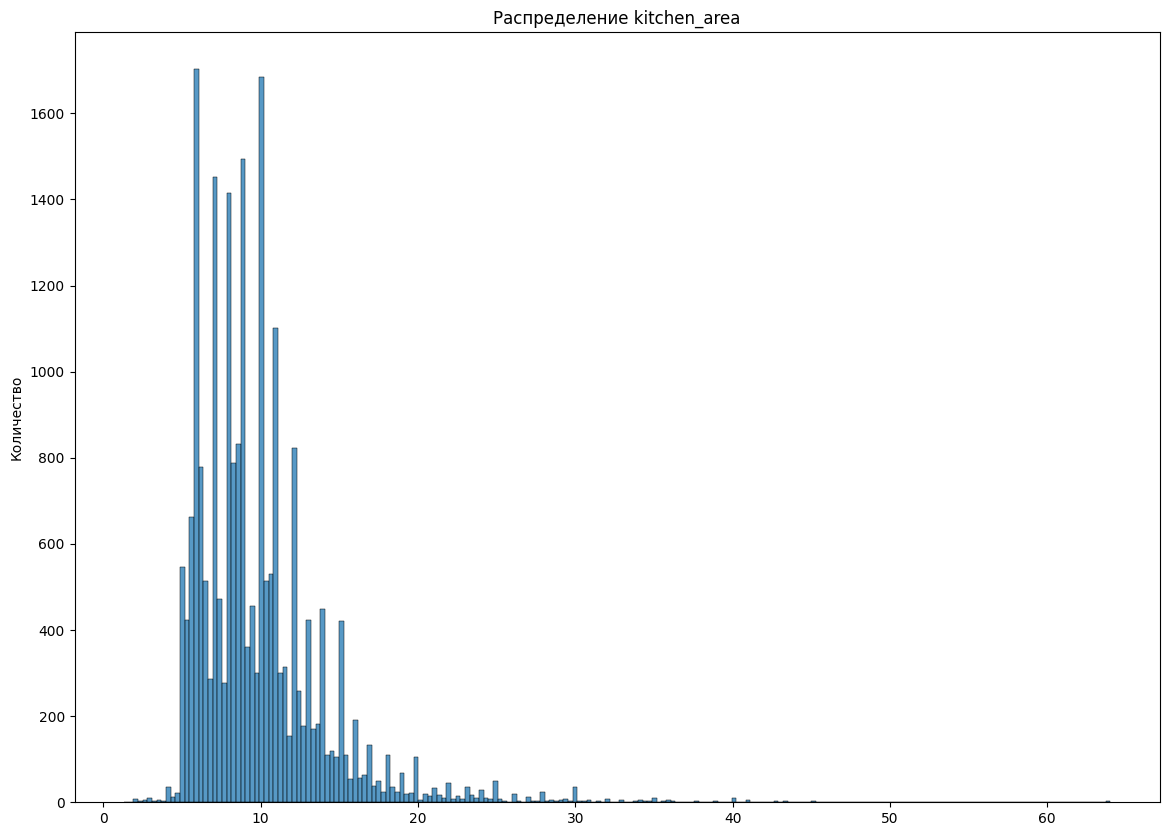

In [39]:
histogr('kitchen_area')

Многие объекты имеют кухни стандартных площадей. Наибольшее количество стандартных площадей кухонь приходится на диапазон 5-15 кв.м.  

**Распределение объектов по конечной цене ("last_price")**

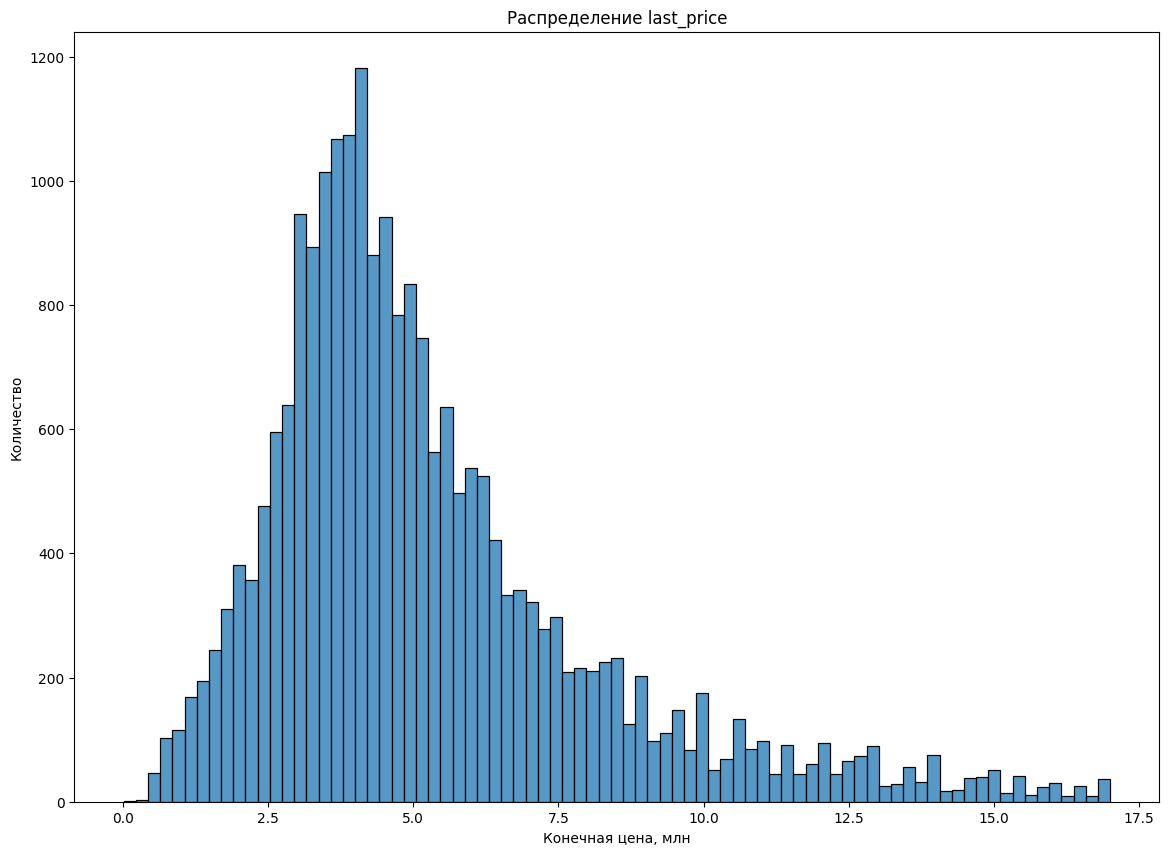

In [40]:
histogr('last_price')

Наибольшее количество выставленных на продажу объектов имеют цену 2-7 млн. Пик приходится на диапазон 3.0-4.6 млн.  
Количество объектов ценой свыше 10 млн. незначительно относительно общего числа.

**Распределение объектов по количеству комнат ("rooms")**

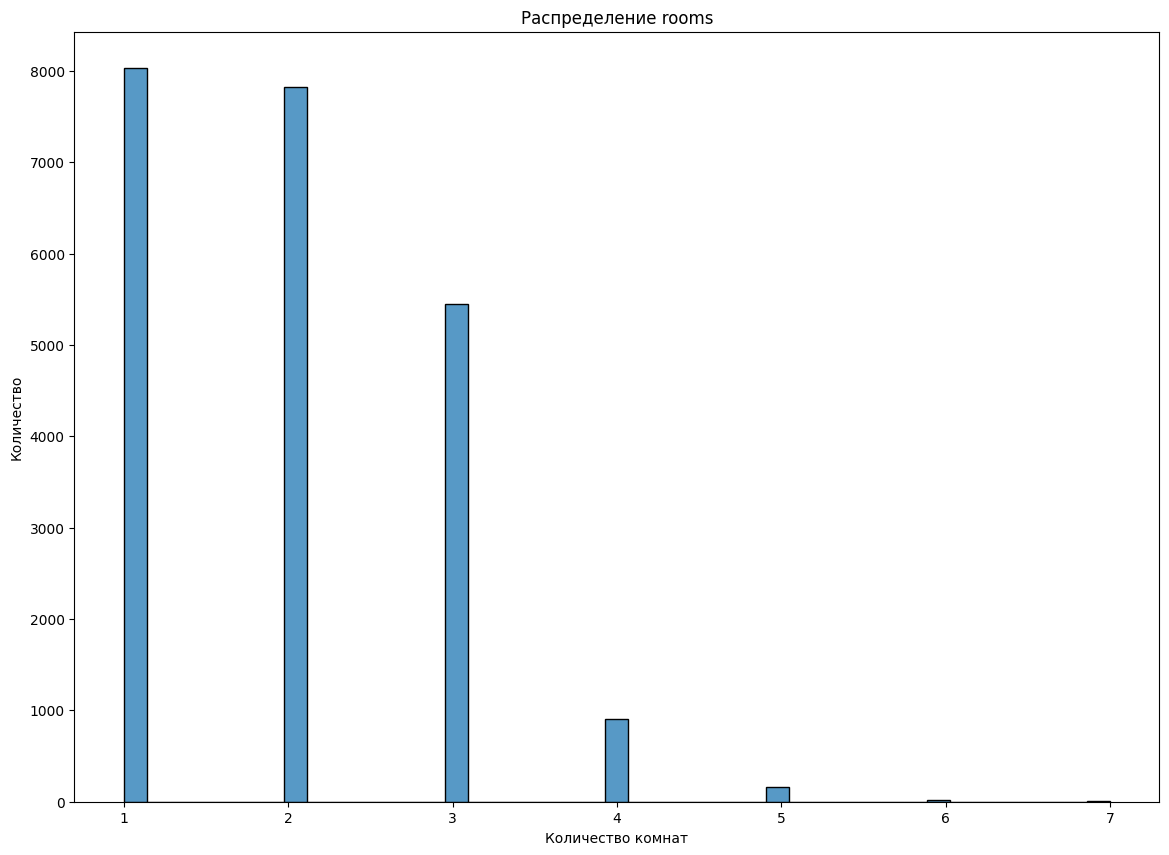

In [41]:
histogr('rooms')

Больше всего опубликовано объявлений о продаже однокомнатных и двухкомнатных квартир - 7600-7900. Несколько меньше объявлений о трёхкомнатных квартирах - 5300. Количество объявлений о продаже пяти- и более комнатных квартир незначительно.

**Распределение объектов по высоте потолка ("ceiling_height")**

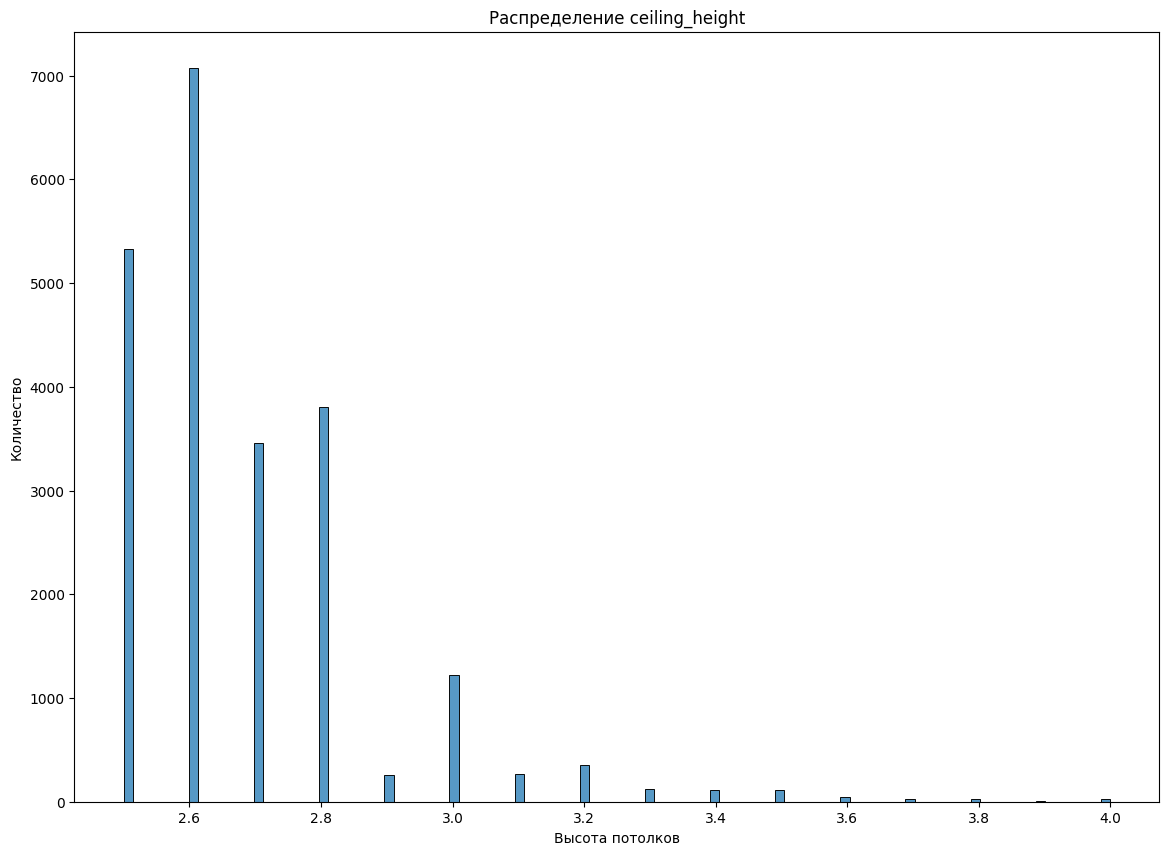

In [42]:
histogr('ceiling_height')

Больше всего опубликовано объявлений о продаже квартир в высотой потолка 2.5-2.8 м - 3000-7000 объявлений для каждой высоты. Пик приходится на высоту потолков 2.6 м - около 7000. Количество объявлений о продаже квартир с высотой свыше 2.8 м незначительно.

**Распределение объектов по этажам ("floor")**

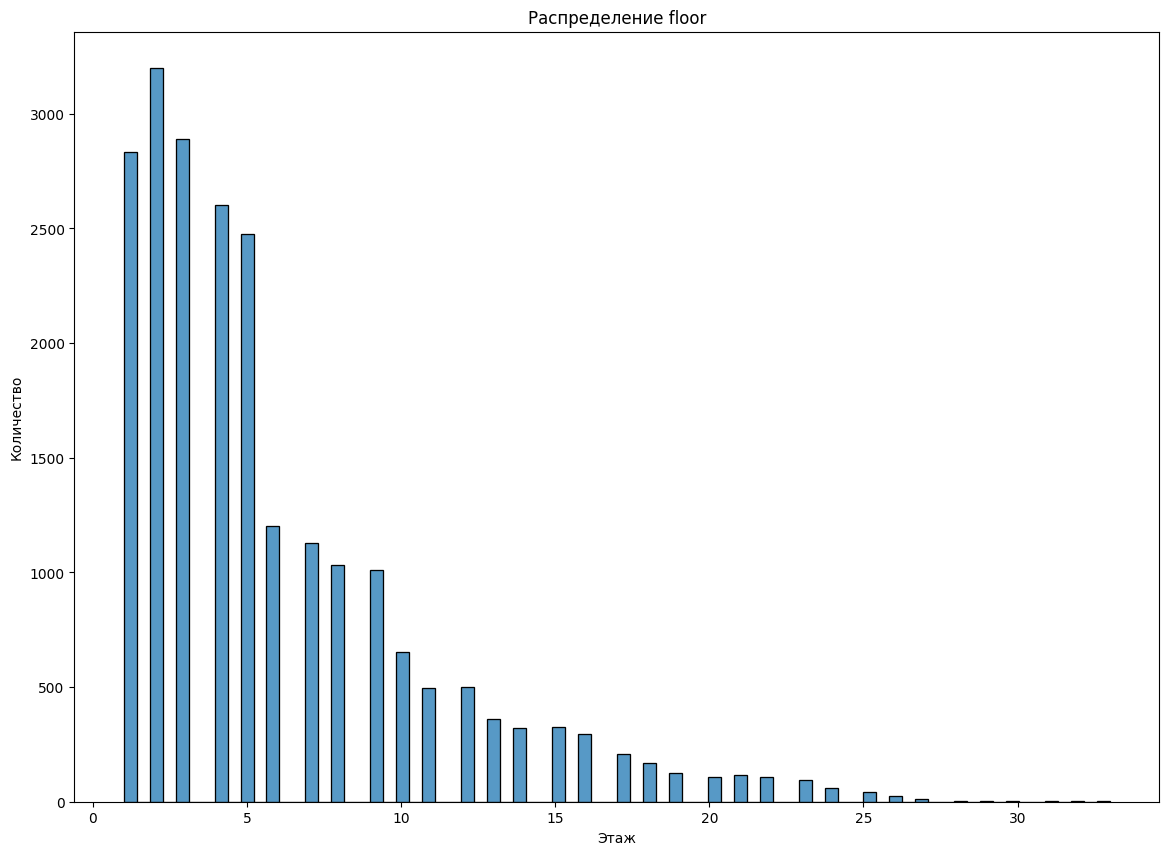

In [43]:
histogr('floor')

Чаще всего публикуются объявления о продаже квартир, расположенных на 1-5 этажах. Это обусловлено большим количеством 5-ти этажных жилых зданий в Санкт-Петербурге.

**Распределение по классам этажей ("floor_class")**

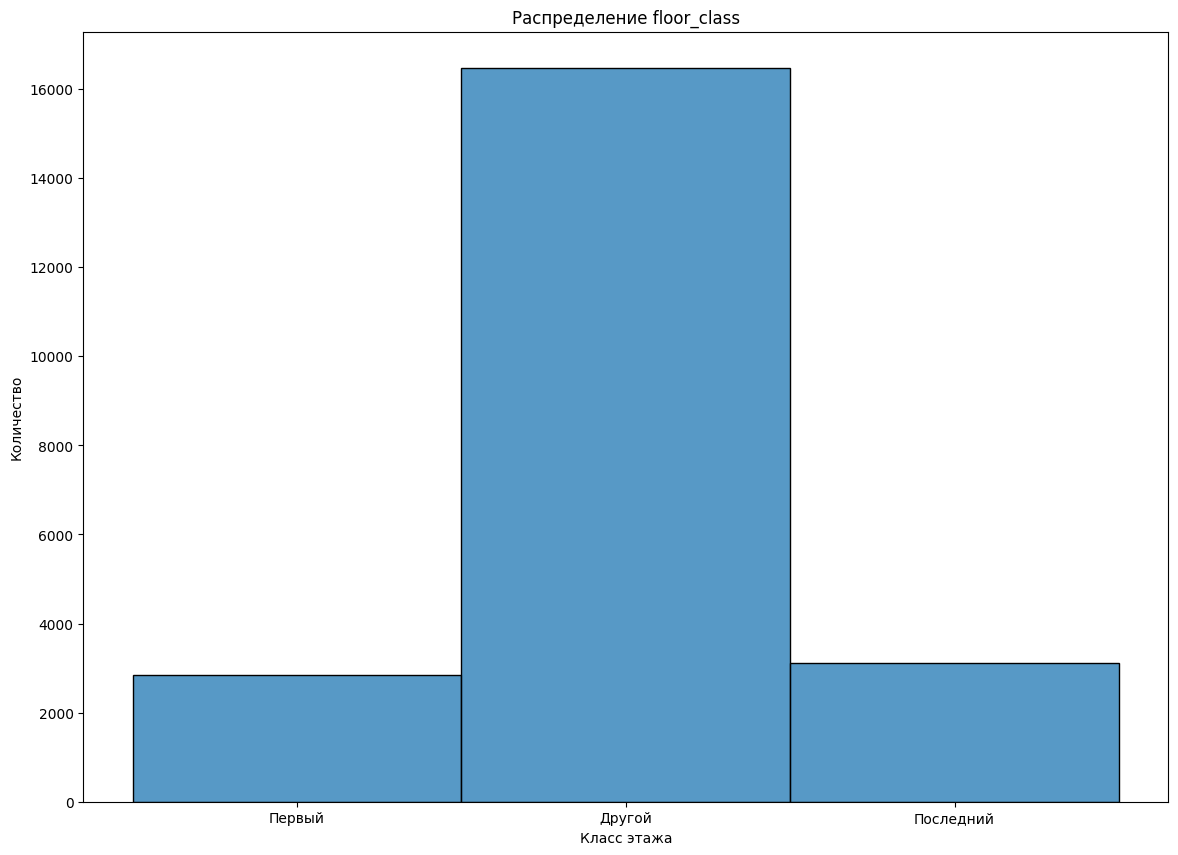

In [44]:
histogr('floor_class')

Количество объявлений о продаже квартир, расположенных на первом и последнем этажах примерно одинаково - около 2500 объявлений для того и другого. Количество объявлений о продаже квартир, расположенных на других этажах - около 16000.

**Распределение объектов по этажности домов ("floors_total")**

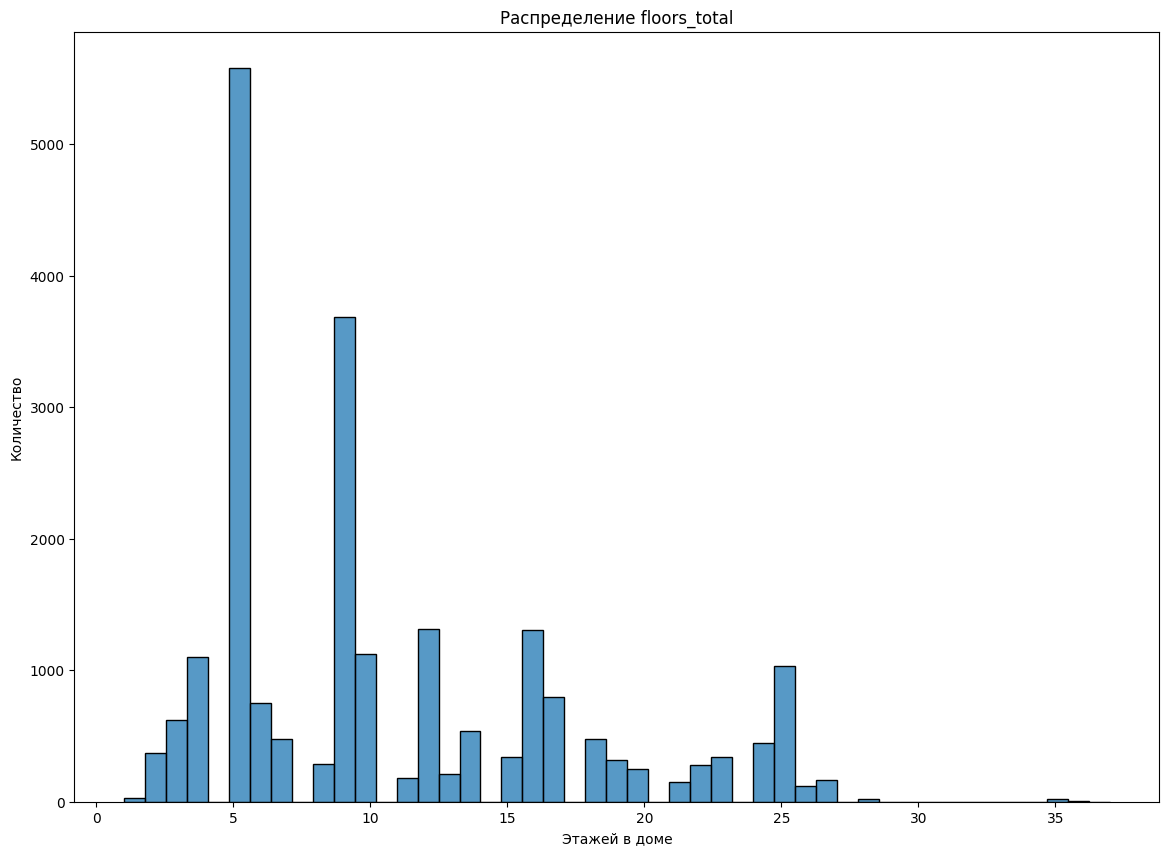

In [45]:
histogr('floors_total')

Наибольшее количество объявлений - о продаже квартир в пятиэтажных (около 5500 объявлений) и девятиэтажных (около 3500 объявлений) домах.

**Распределение объектов по расстоянию до центра ("cityCenters_nearest")**

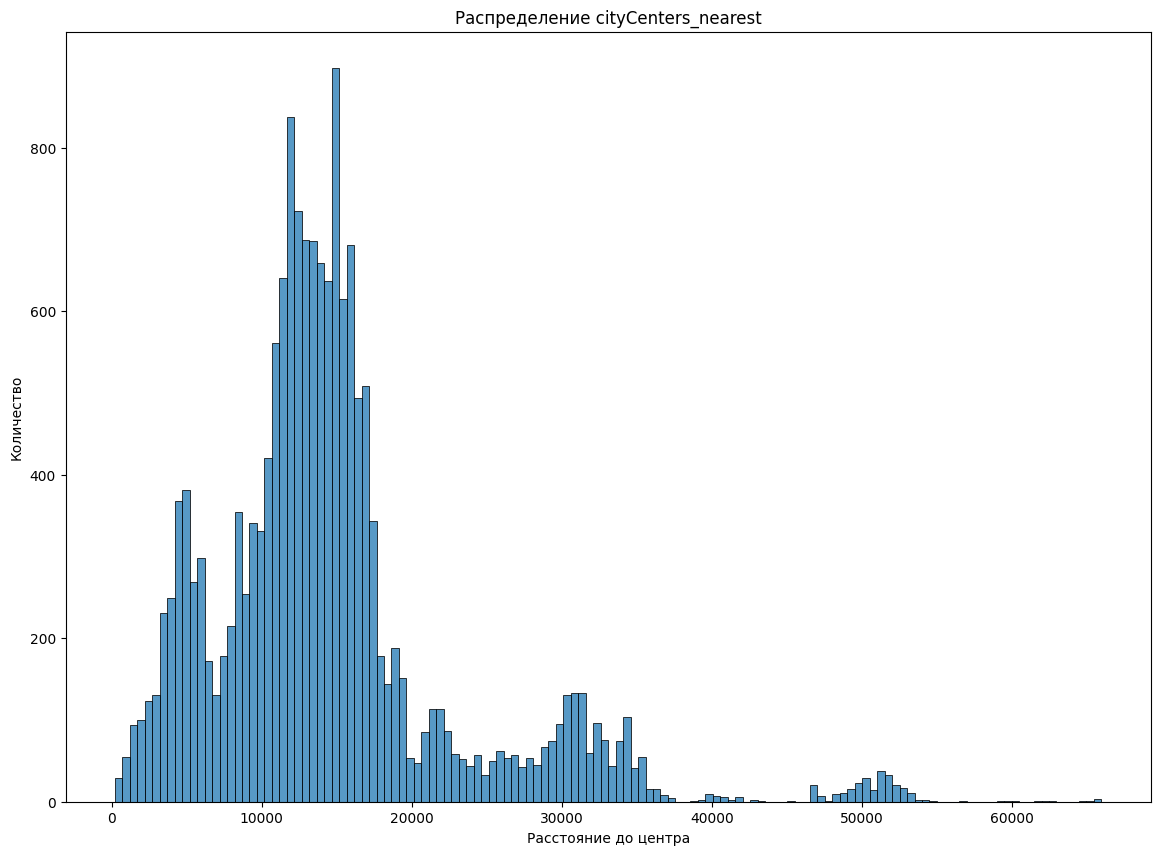

In [46]:
histogr('cityCenters_nearest')

Наибольшее количество объектов, о продаже которых опубликованы объявления, расположены на расстоянии 5000-16000 м от центра. Пик приходится на диапазон 11000-16000 м.  

**Распределение объектов по расстоянию до аэропорта ("airports_nearest")**

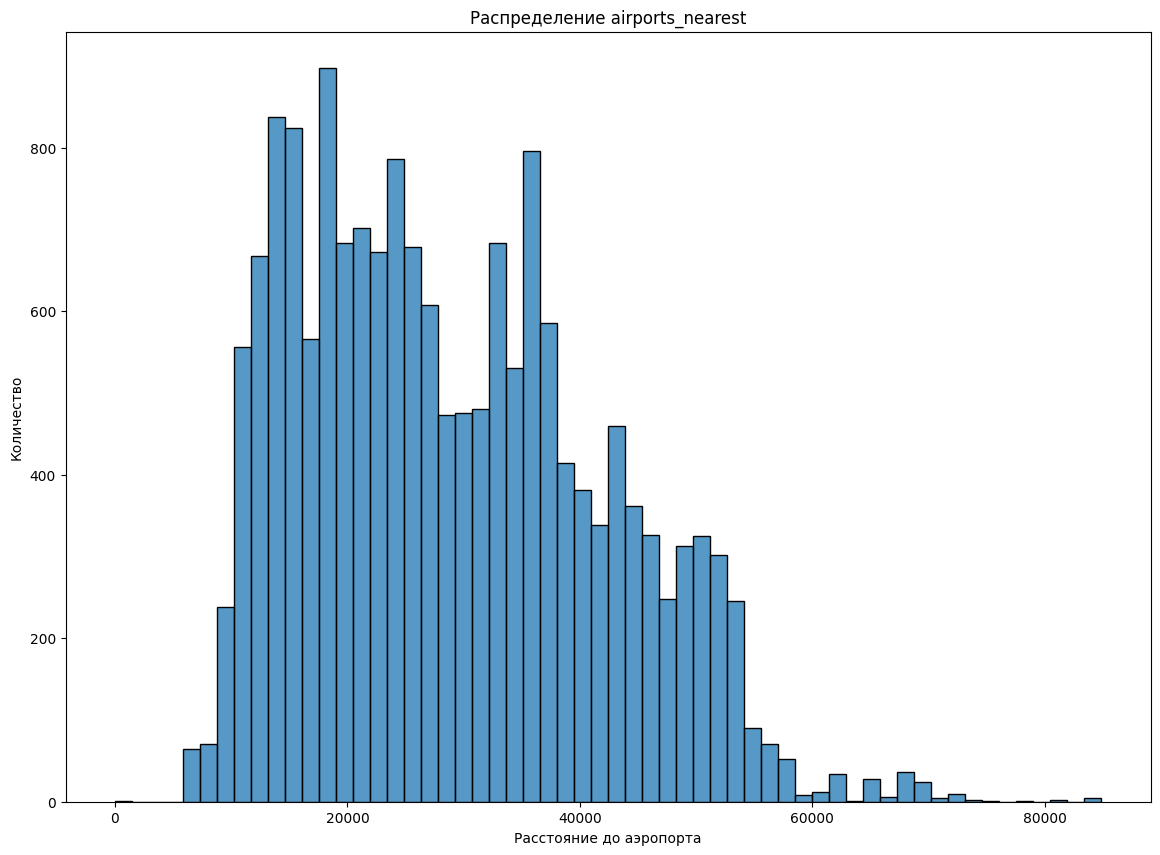

In [47]:
histogr('airports_nearest')

Наибольшее количество объектов, о продаже которых опубликованы объявления, расположены на расстоянии 11000-56000 м от аэропорта. Пик приходится на диапазон 16000-18000 м.  

**Распределение объектов расстоянию до парка ("parks_nearest")**

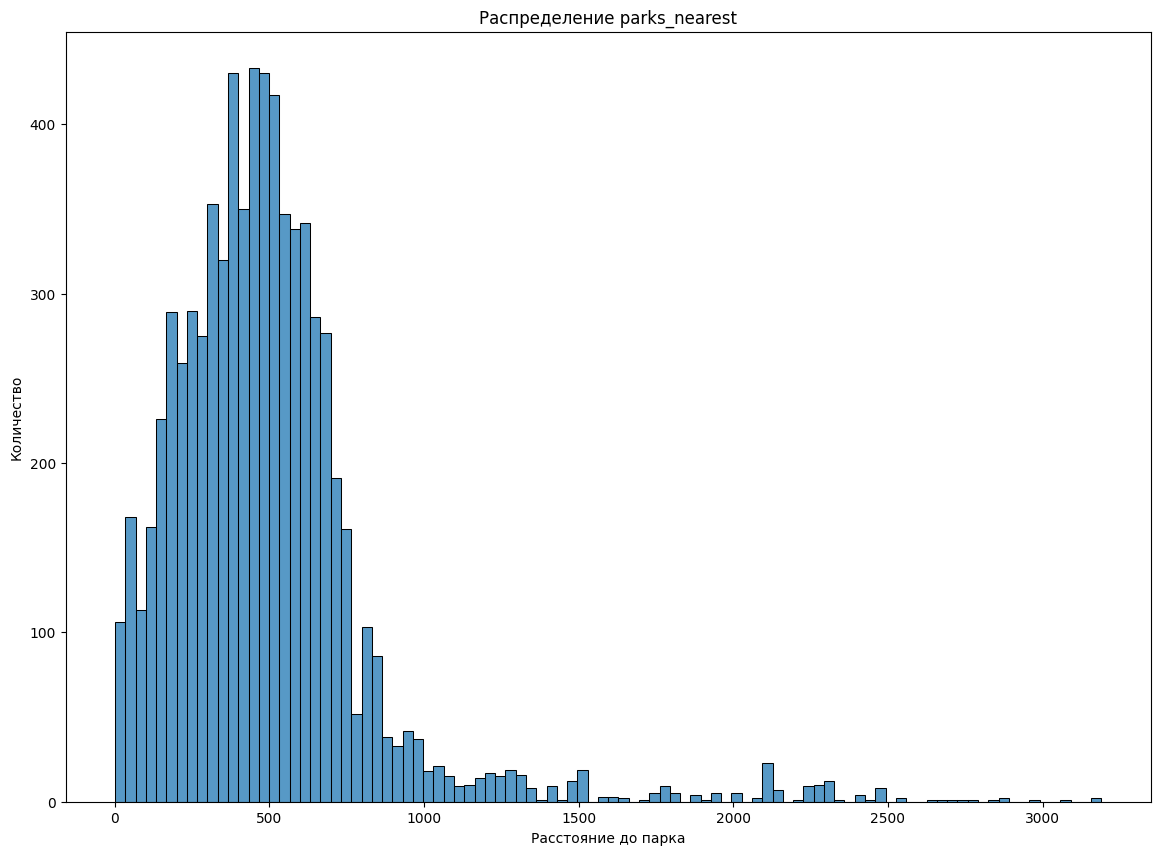

In [48]:
histogr('parks_nearest')

Чаще всего продаваемые объекты расположены на расстоянии 0-750 метров от парка. Пик приходится на диапазон 400-500 метров. Количество объявлений о продаже объектов, расположенных на расстоянии свыше 1000 метров от парка, незначительно.

**Распределение публикаций объявлений по дням недели ("dayofweek")**

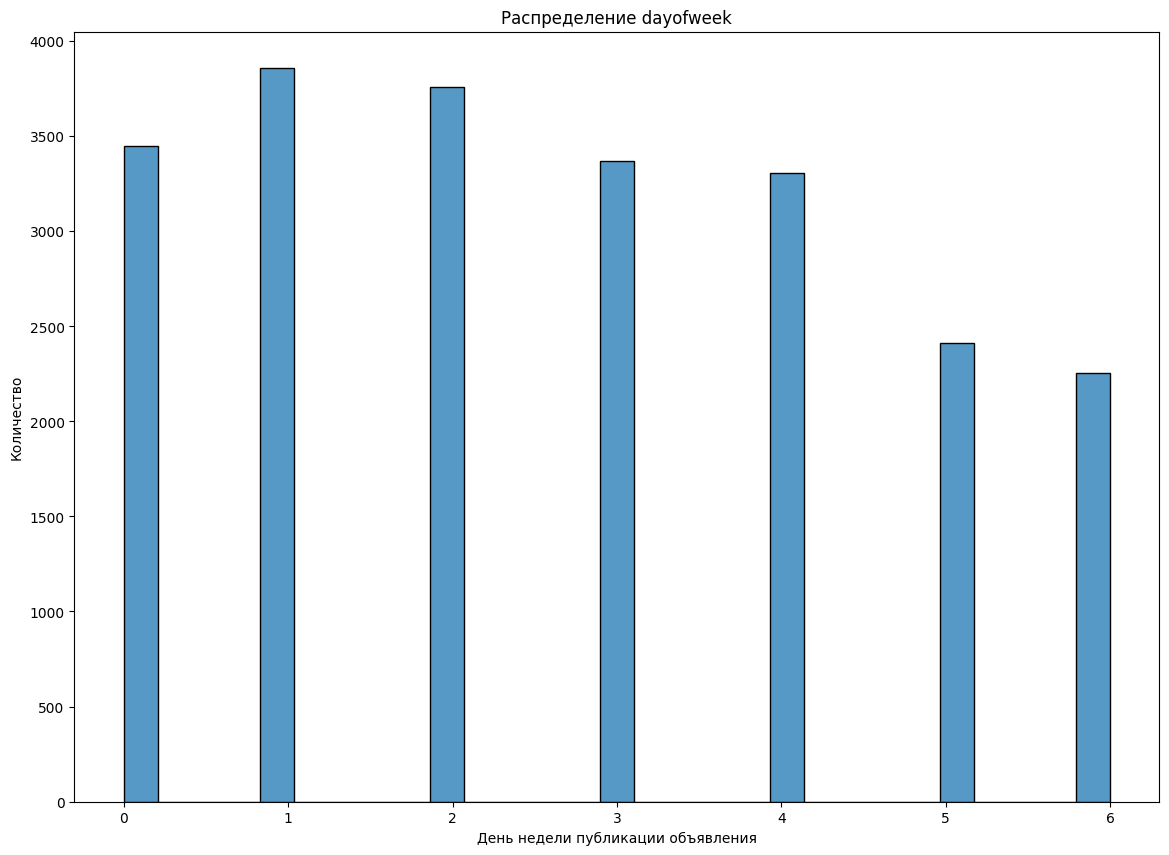

In [49]:
histogr('dayofweek')

Чаще объявления публикуются в будние дни. Наибольшее количество объявлений публикуется во вторник и среду - свыше 3500 объявлений в каждый из дней.

**Распределение публикаций объявлений по месяцам ("month")**

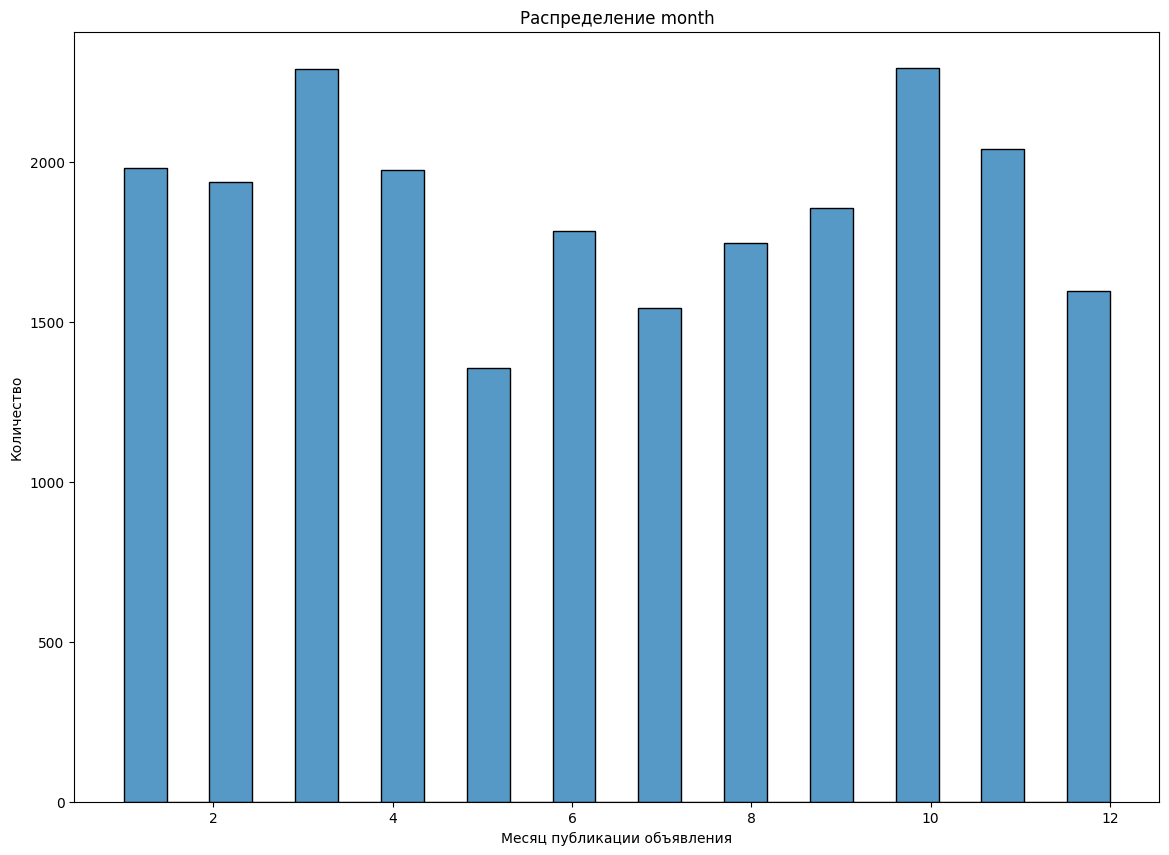

In [50]:
histogr('month')

Меньше всего объявлений подается в середине года (май-сентябрь) и в декабре.

### Сроки продажи квартир
<a id="sale_time"></a>

Строим гистограмму по срокам публикаций объявлений:

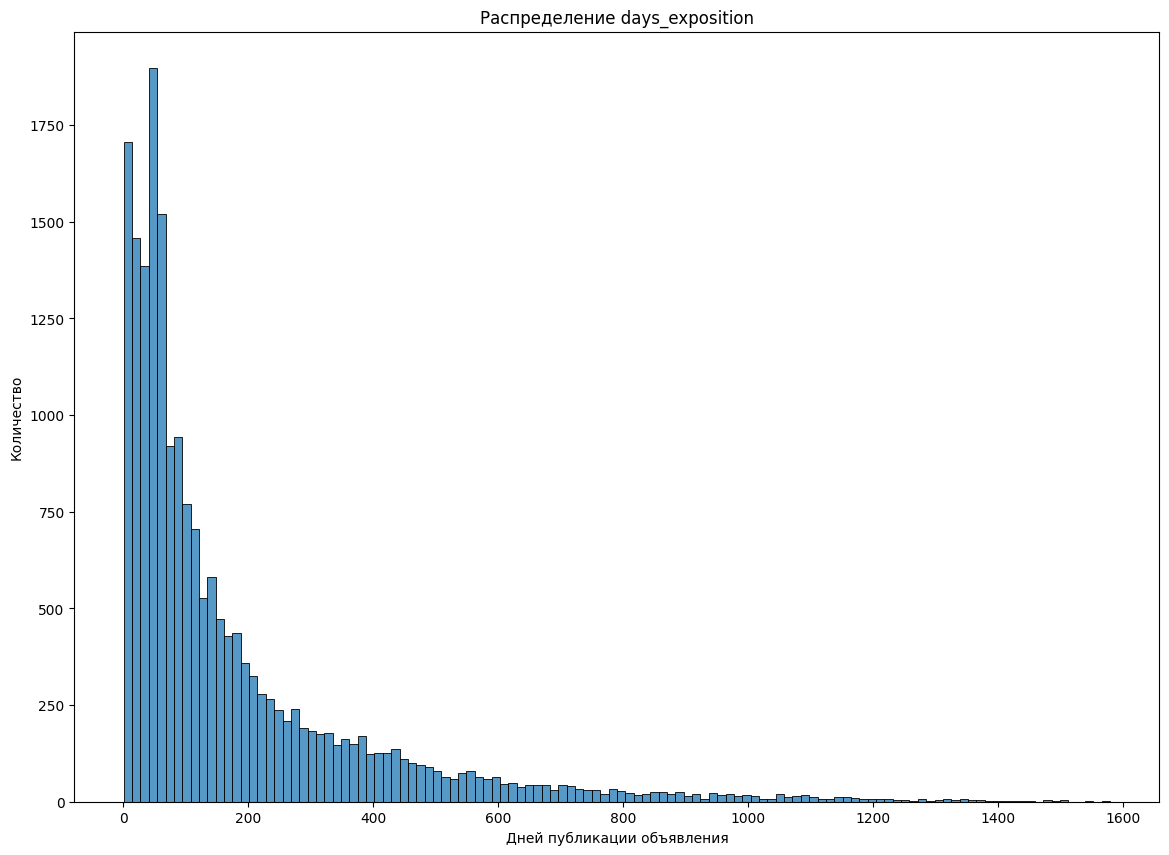

In [51]:
histogr('days_exposition')

In [52]:
print('Медиана - {}'.format(df_work["days_exposition"].median()))
print('Среднее - {:.5}'.format(df_work["days_exposition"].mean()))

Медиана - 93.0
Среднее - 177.04


Большинство объявлений снимается через 1-100 дней после публикации. Число объявлений, снятых через 800 и более дней, незначительно по отношению к общему количеству. Смещение среднего (177) относительно медианы (93) свидетельствует о наличие выбросов в большую сторону.  

### Влияние основных параметров объектов на их цену
<a id="parameters_cost"></a>

***Зависимость цены объекта от общей площади объекта***

Строим точечную диаграмму зависимости цены объекта от общей площади объекта:

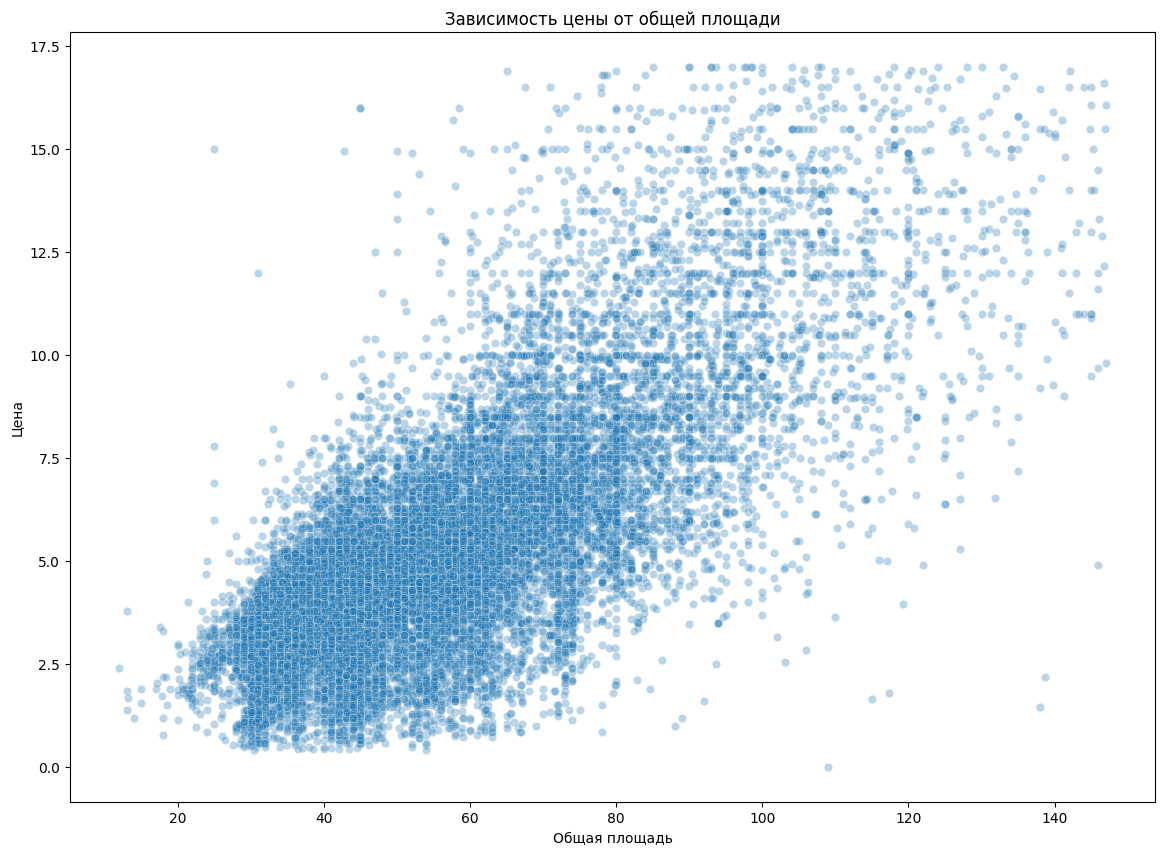

In [53]:
plt.figure(figsize=(14,10))
ax = sns.scatterplot(x='total_area', y='last_price', data=df_work.loc[df_work['total_area'] >= 0], alpha=0.3)
ax.set_title('Зависимость цены от общей площади')
ax.set_ylabel('Цена')
ax.set_xlabel('Общая площадь')
plt.show()

С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены. Для объектов с площадью свыше 100 кв.м. рассеивание столь велико, что зависимость прослеживается слабо. 
Минимальные значения цены (около 0,6 млн.) в основном имеют место для объектов, площадью меньше 70 кв.м., максимальные достигают 16 млн. для 45-140 кв.м.

***Зависимость цены объекта от жилой площади объекта***

Строим точечную диаграмму зависимости цены объекта от жилой площади объекта:

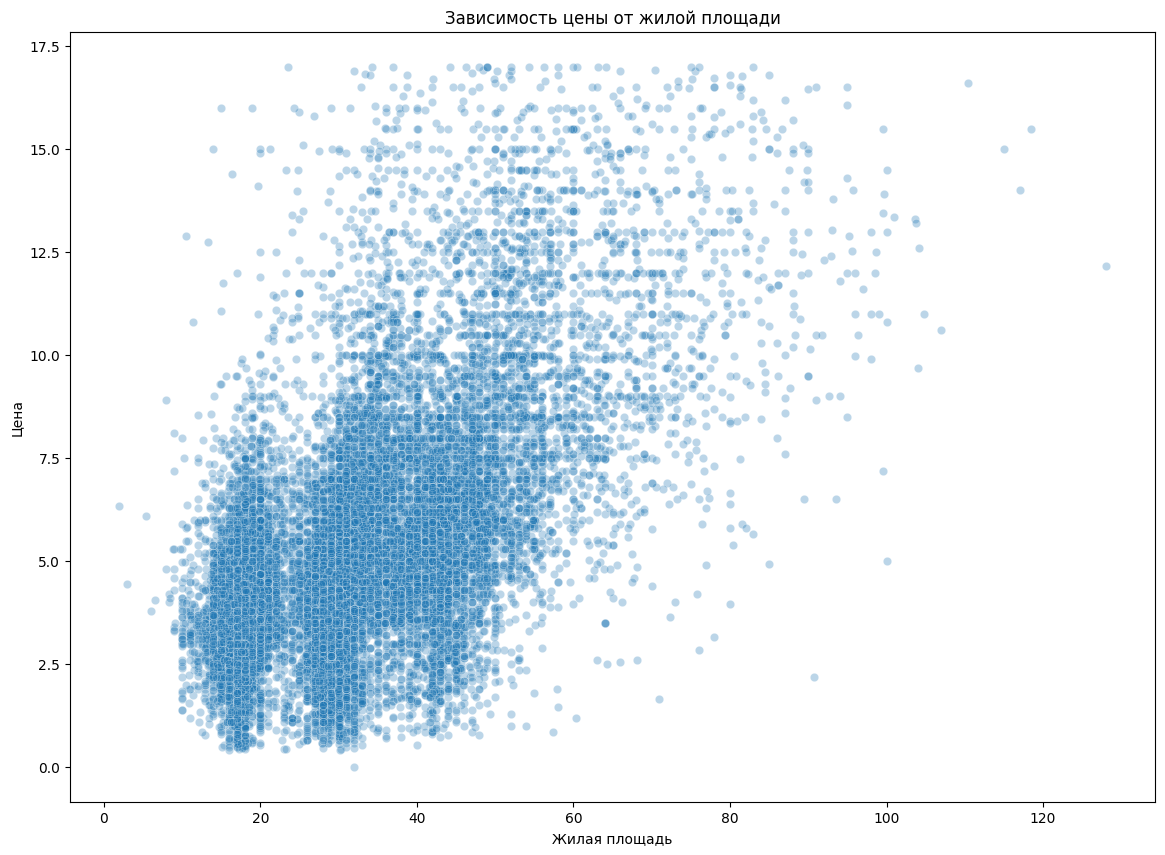

In [54]:
plt.figure(figsize=(14,10))
ax = sns.scatterplot(x='living_area', y='last_price', data=df_work.loc[df_work['living_area'] >= 0], alpha=0.3)
ax.set_title('Зависимость цены от жилой площади')
ax.set_ylabel('Цена')
ax.set_xlabel('Жилая площадь')
plt.show()

Для большинства объектов с жилой площадью до 22 кв.м. цена не превышает 7.5 млн.  
Для большинства объектов с жилой площадью 22-50 кв.м. не превышает 10 млн.  
С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены.

***Зависимость цены объектов от площади кухни***

Строим точечную диаграмму зависимости цены объектов от площади кухни:

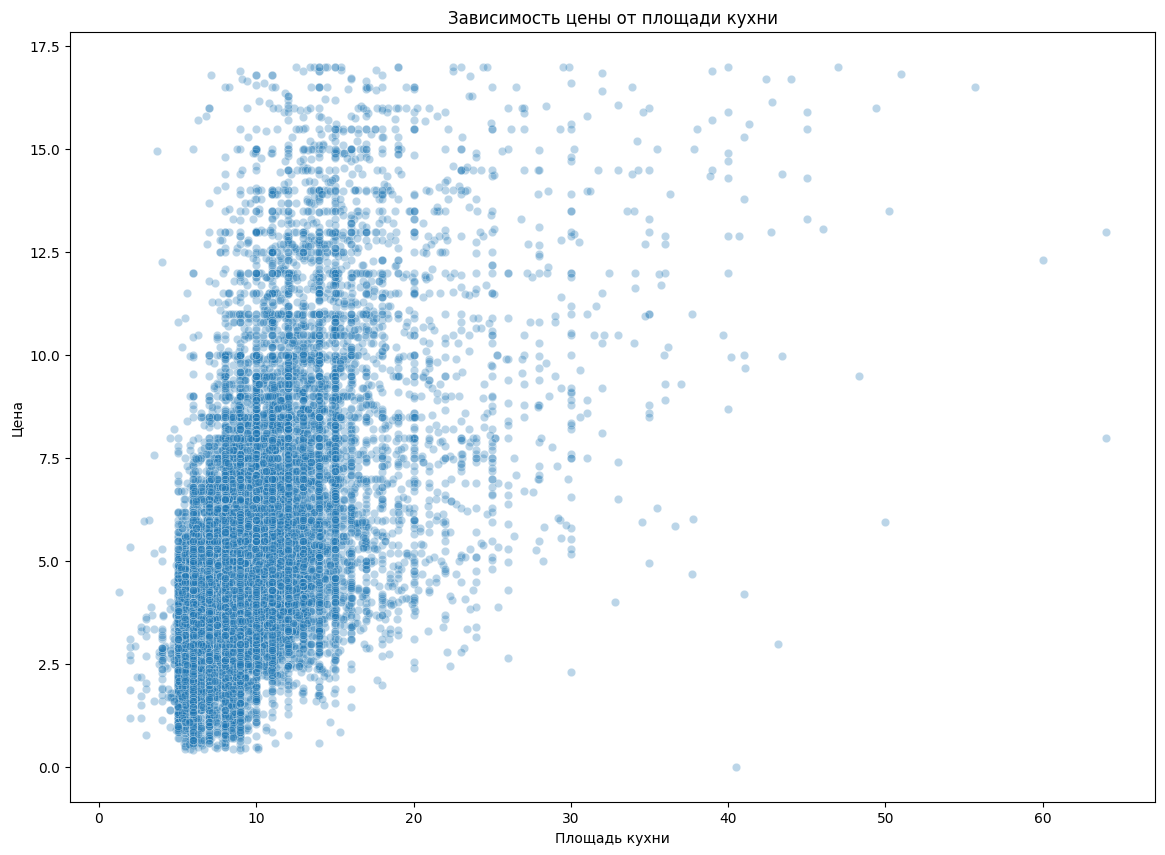

In [55]:
plt.figure(figsize=(14,10))
ax = sns.scatterplot(x='kitchen_area', y='last_price', data=df_work.loc[df_work['kitchen_area'] >= 0], alpha=0.3)
ax.set_title('Зависимость цены от площади кухни')
ax.set_ylabel('Цена')
ax.set_xlabel('Площадь кухни')
plt.show()

Большинство объектов находится в диапазонах:
- по площади кухни - до 17 кв.м.;
- по цене - до 10 млн.
При площади кухни свыше 20 кв.м. зависимость цены от данного параметра не прослеживается.  

В целом, площадь кухни в меньшей степени влияет на цену объекта, нежели жилая и общая площади.

***Зависимость цены объектов от количества комнат***

Создаем сводную таблицу, содержащую значения медиан цены для каждого количества комнат:

In [56]:
rooms_lp = df_work.pivot_table(index='rooms', values='last_price', aggfunc='mean')
rooms_lp.columns = ['rooms_price']
rooms_lp

,rooms_price
rooms,
1,3.786998
2,5.273391
3,6.719275
4,8.125954
5,9.748013
6,11.086818
7,13.872500


Строим диаграмму зависимости цены объекта от количества комнат:

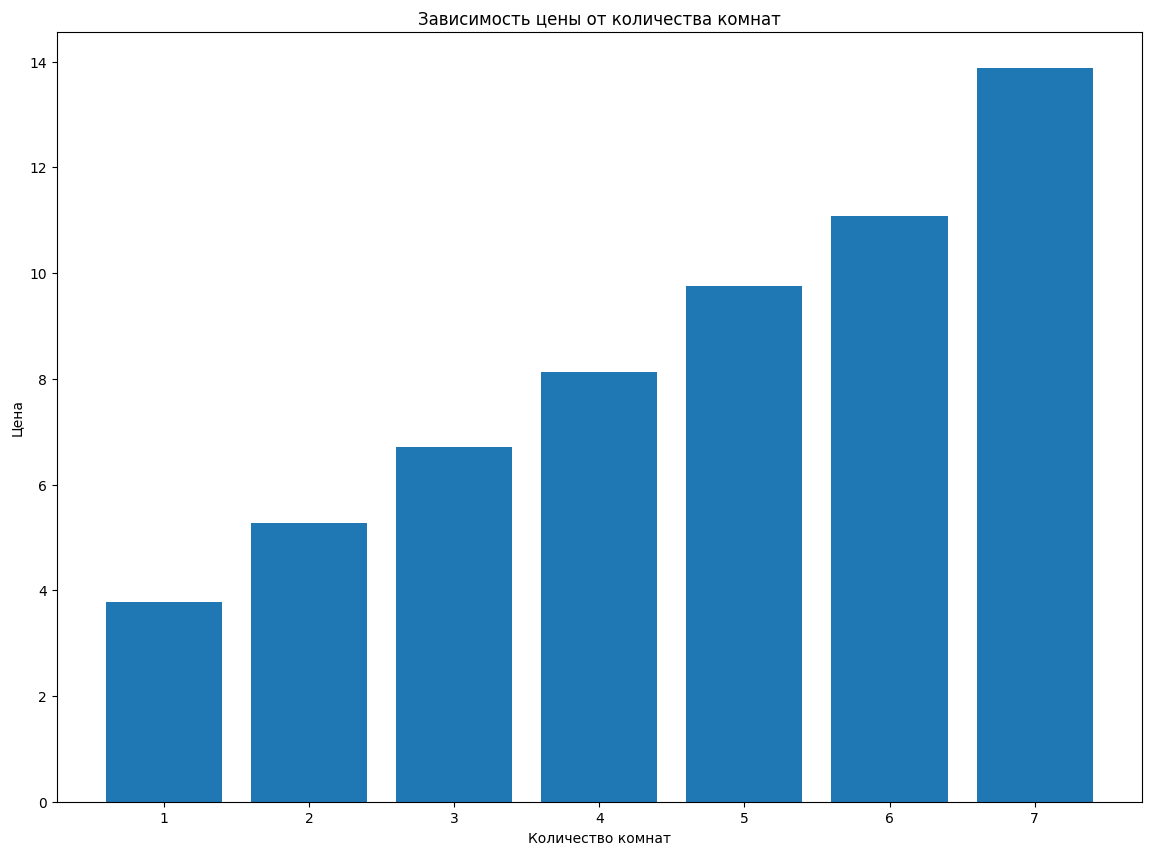

In [57]:
plt.figure(figsize=(14,10))
ax = plt.bar(rooms_lp.index, rooms_lp['rooms_price'])
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.show()

Прослеживается линейная зависимость средней цены объекта от количества комнат: средняя цена увеличивается с 3.78 млн за однокомнатную до 13.87 за семикомнатную.

***Зависимость цены объектов от этажа***

Создаем сводную таблицу, содержащую значения средней цены объекта для каждого класса этажей (1 - "Первый", 2 - "Другой", 3 - "Последний"):

In [58]:
floor_df = df_work.pivot_table(index='floor_class', values='last_price', aggfunc='mean')
floor_df.columns = ['floor_price']
floor_df

,floor_price
floor_class,
Первый,4.296421
Другой,5.480982
Последний,4.876087


Строим диаграмму зависимости средней цены объектов от класса этажа:

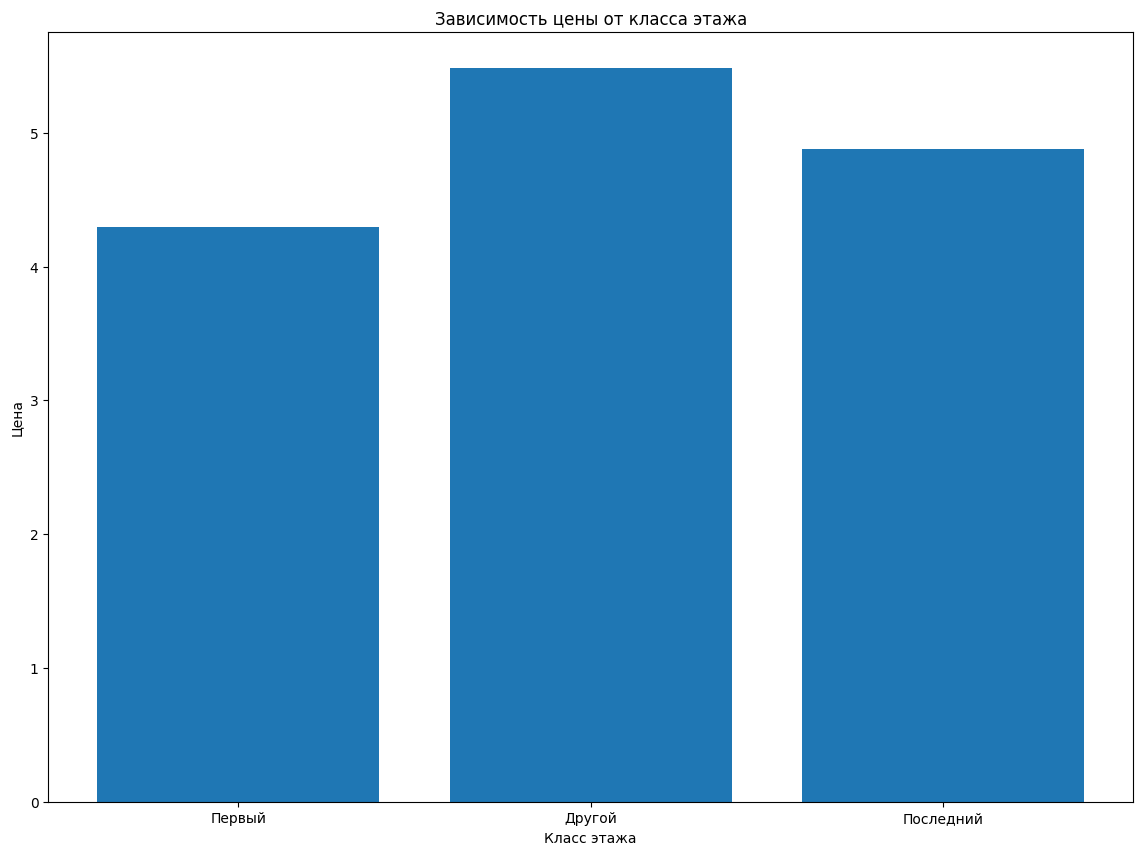

In [59]:
plt.figure(figsize=(14,10))
ax = plt.bar(floor_df.index, floor_df['floor_price'])
plt.title('Зависимость цены от класса этажа')
plt.ylabel('Цена')
plt.xlabel('Класс этажа')
plt.show()

Наименьшая средняя цена наблюдается у объектов, расположенных на первом этаже, - 4.29 млн. Для последнего этажа средняя цена - 4.87 млн. Наибольшую среднюю цену имеют объекты класса "Другое" - 5.46 млн.

**Зависимость цены объектов от дня недели публикаций объявлений**

Создаем сводную таблицу, в которой рассчитывается средняя цена объекта для каждого дня недели публикации объявления:

In [60]:
day_df = df_work.pivot_table(index='dayofweek', values='last_price', aggfunc='mean')
day_df

,last_price
dayofweek,
0,5.285796
1,5.188980
2,5.297382
3,5.266923
4,5.273188
5,5.218627
6,5.167358


Строим линейный график зависимости средней цены объектов от дня недели публикации объявлений:

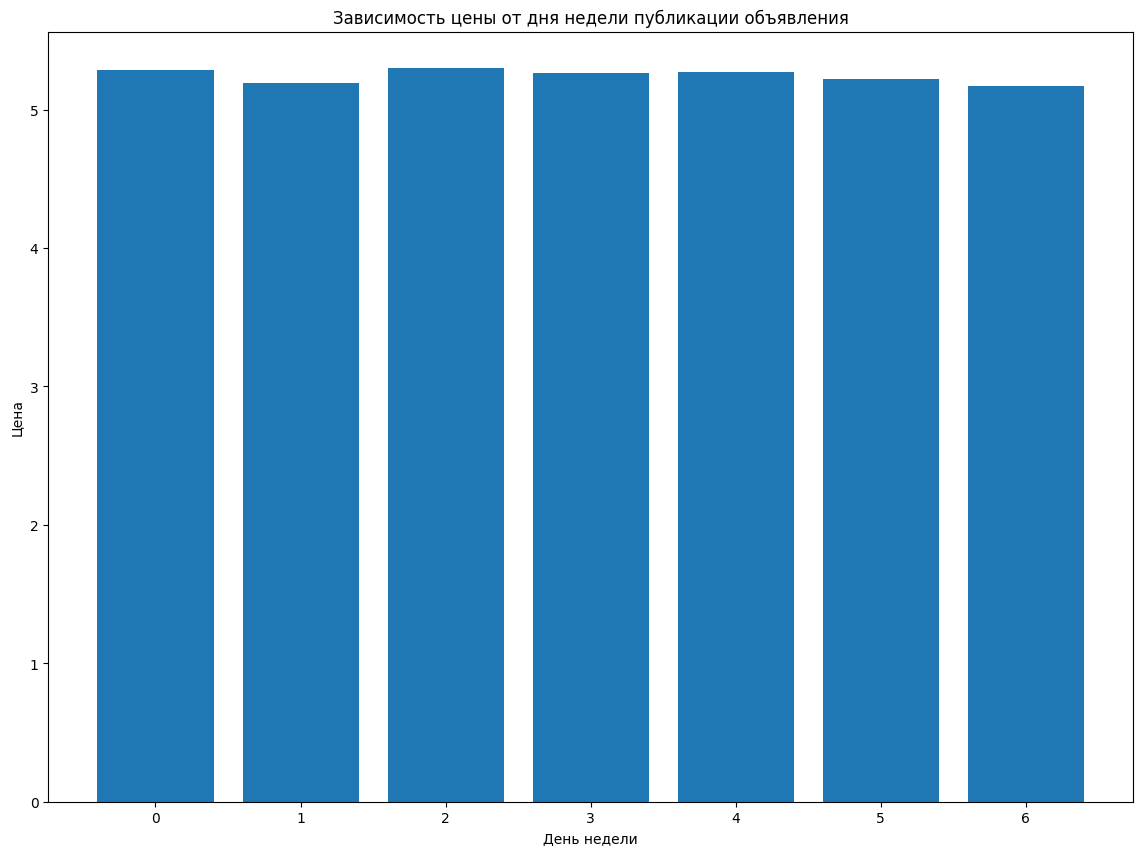

In [61]:
plt.figure(figsize=(14,10))
ax = plt.bar(day_df.index, day_df['last_price'])
plt.title('Зависимость цены от дня недели публикации объявления')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

Наименьшую среднюю цену имеют объекты, объявления о которых опубликованы во вторник (5.17 млн), субботу (5.21) и воскресенье (5.15 млн). Средняя цена объектов, объявления о которых опубликованы в другие дни, колеблется в диапазоне 5.26-5.28 млн.

**Зависимость средней цены объектов от месяца публикаций объявлений**

Создаем сводную таблицу, в которой рассчитывается средняя цена объекта для каждого месяца публикации объявления:

In [62]:
month_df = df_work.pivot_table(index='month', values='last_price', aggfunc='mean')
month_df

,last_price
month,
1,5.232522
2,5.274443
3,5.206210
4,5.412493
5,5.072657
6,5.009543
7,5.210869
8,5.321586
9,5.316505


Строим линейный график зависимости средней цены объектов от месяца публикации объявлений:

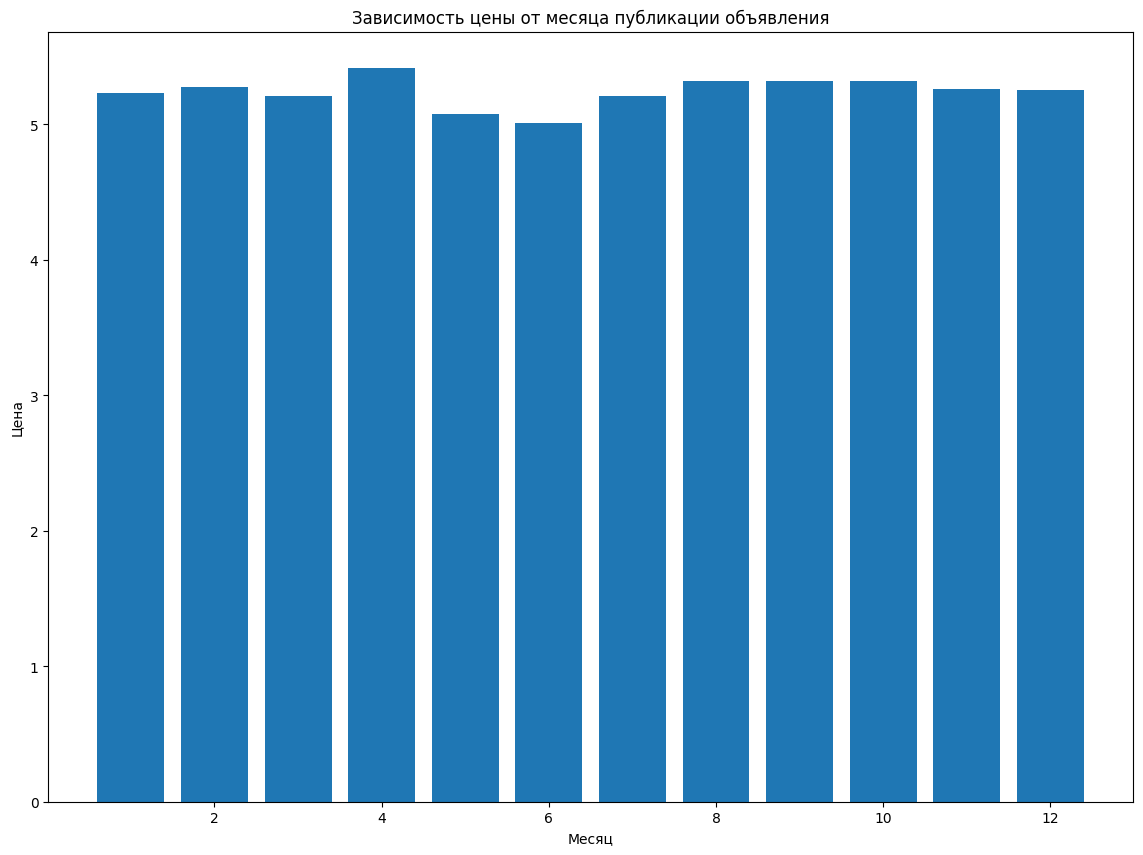

In [63]:
plt.figure(figsize=(14,10))
ax = plt.bar(month_df.index, month_df['last_price'])
plt.title('Зависимость цены от месяца публикации объявления')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

Наибольшую среднюю цену имеют объекты, объявления о которых опубликованы в апреле (5.40 млн). Наименьшую - в мае (5.06 млн) и июне (5.00). В остальные месяцы медиана цены колеблется в диапазоне 5.19-5.30 млн.  
В целом, во второй половине года средняя цена выше, нежели в первой.

**Зависимость средней цены объектов от года публикаций объявлений**

Создаем сводную таблицу, в которой рассчитывается средняя цена объекта для каждого года публикации объявления:

In [64]:
year_df = df_work.pivot_table(index='year', values='last_price', aggfunc='mean')
year_df

,last_price
year,
2014,7.095544
2015,5.808404
2016,5.210040
2017,5.160831
2018,5.135957
2019,5.563998


Строим линейный график зависимости средней цены объектов от года публикации объявлений:

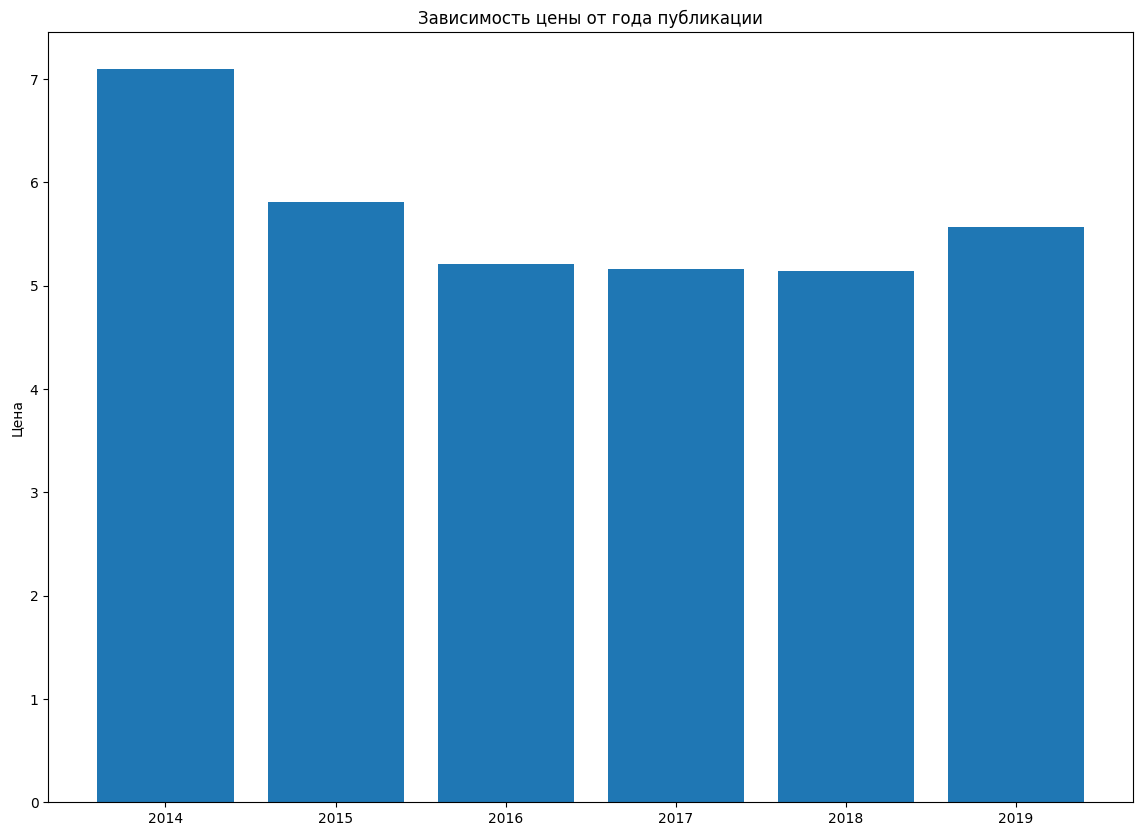

In [65]:
plt.figure(figsize=(14,10))
ax = plt.bar(year_df.index, year_df['last_price'])
plt.title('Зависимость цены от года публикации')
plt.ylabel('Цена')
plt.show()

В период 2014-2018 средняя цена объектов снизилась с 7.10 до 5.12 млн. К 2019 поднялась до 5.54 млн.

***Корреляция основных параметров***

Необходимо определить корреляцию основных параметров. Для этого собираем их в сводную таблицу:

In [66]:
all_corr_df = df_work.pivot_table(index=df_work.index, values=['rooms', 'floor', 'total_area', 'cityCenters_nearest', 'last_price', 'month', 'year'])

Вычисляем корреляцию параметров:

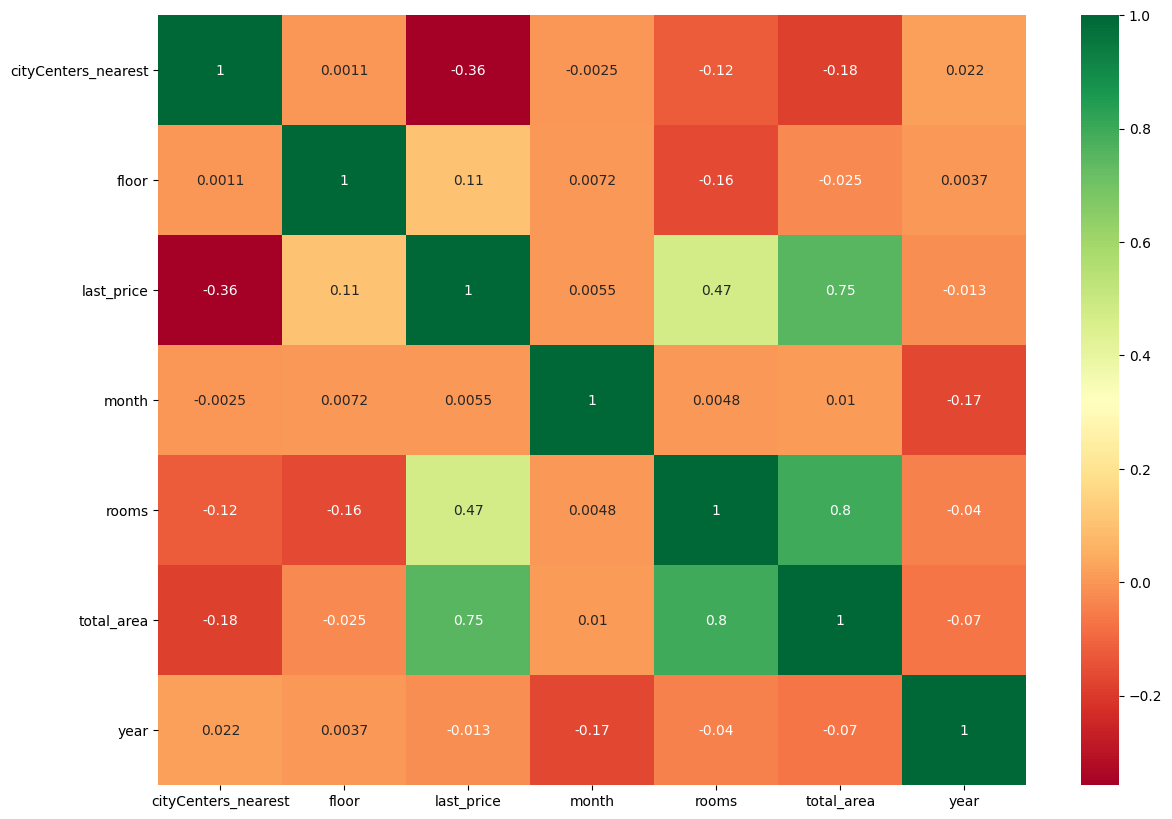

In [67]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(all_corr_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

Выявлена прямая корреляция следующих параметров:  
- количество комнат/общая площадь - 0,80;
- цена/общая площадь - 0,75;
- цена/количество комнат - 0,47;  

Обратная корреляция выявлена для пары цена/расстояние до центра - минус 0,36.  
Для остальных пар величина корреляции незначительна.

### Анализ населенных пунктов с наибольшим числом объявлений
<a id="big_cities"></a>

Необходимо определить населенные пункты, по которым опубликовано наибольшее количество объявлений, и проанализировать среднюю цену квадратного метра в них.

Создаем сводную таблицу, содержащую десять городов с наибольшим количеством объявлений:

In [68]:
df_locality = df_work.pivot_table(index='locality_name_unique', values='price_m', aggfunc=['count', 'mean'])
df_locality.columns = df_locality.columns.droplevel(1)
df_locality = (
    df_locality.sort_values(by='count', ascending=False)[:10]
               .sort_values(by='mean')
)
df_locality

,count,mean
locality_name_unique,,
Выборг,235,58075.472340
Всеволожск,390,67200.807692
Гатчина,306,68797.248366
Колпино,337,75332.866469
Шушары,436,78405.277523
Мурино,562,85442.576512
Парголово,322,90448.000000
Кудрово,451,95150.498891
Пушкин,356,101858.820225


Строим диаграмму распределения среднего значения цены по городам.

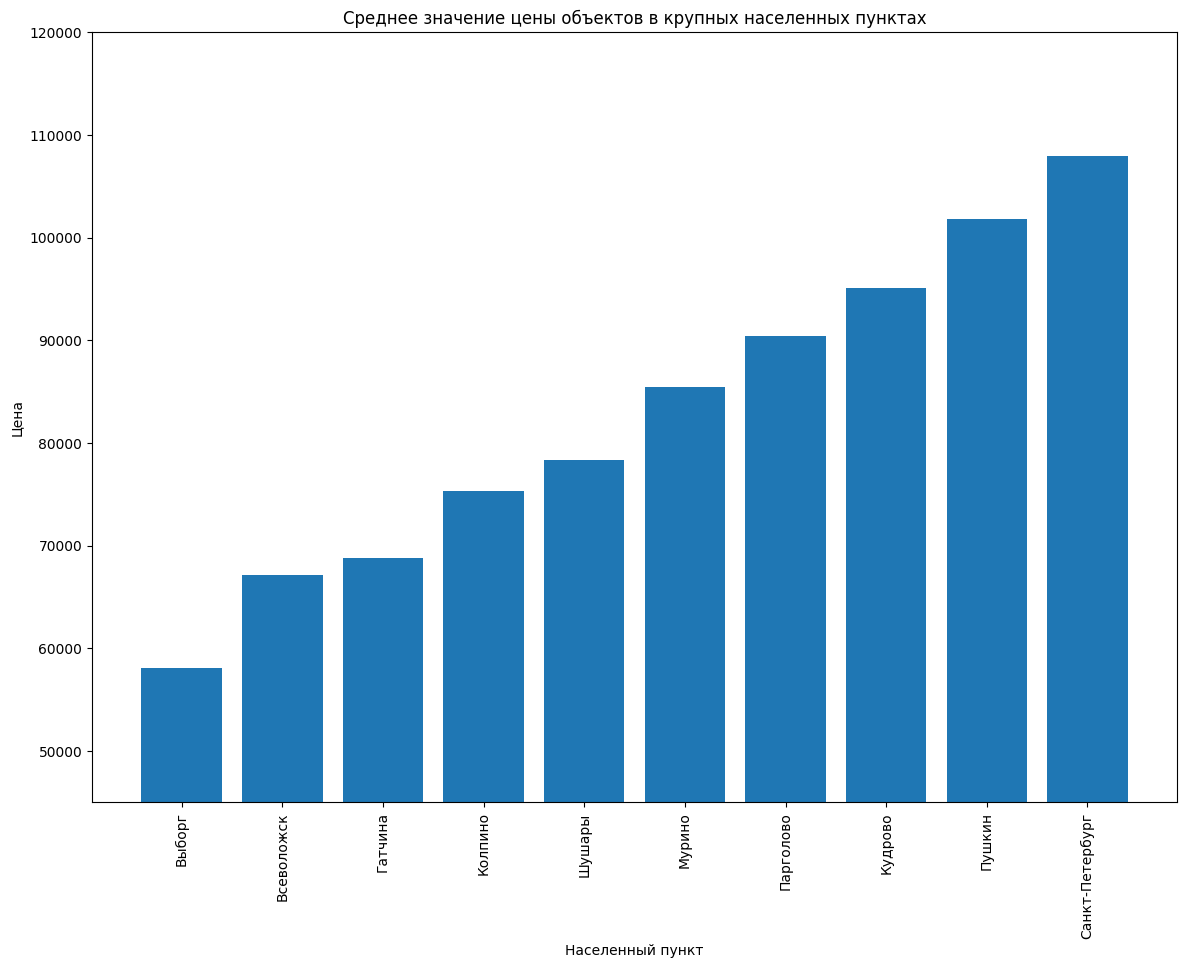

In [69]:
plt.figure(figsize=(14,10))
ax = plt.bar(df_locality.index, df_locality['mean'])
plt.title('Среднее значение цены объектов в крупных населенных пунктах')
plt.ylabel('Цена')
plt.xlabel('Населенный пункт')
plt.xticks(rotation=90)
plt.ylim([45000, 120000])
plt.show()

В десятку населенных пунктов с наибольшим количеством объявлений о продаже недвижимости входят следующие:
- Санкт-Петербург (14563);
- Мурино (562);
- Кудрово (451);
- Шушары (436);
- Всеволожск (390);
- Пушкин (356);
- Колпино (337);
- Парголово (322);
- Гатчина (306);
- Выборг (235).  

По средней цене квадратного метра лидерами являются:
- Санкт-Петербург (108011);
- Пушкин (101858);
- Кудрово (95150);
- Парголово (90448);
- Мурино (85442);
- Шушары (78405);
- Колпино (75332);
- Гатчина (68797);
- Всеволожск (67200);
- Выборг (58075).

### Анализ цен квартир в Санкт-Петербурге
<a id="spb"></a>

Создаем таблицу объектов, находящиеся в Санкт-Петербурге:

In [70]:
df_spb = df_work.query('locality_name_unique == "Санкт-Петербург"').reset_index(drop=True)

Создаем сводную таблицу со средними значениями цены и количеством объявлений в зависимости от расстояния до центра:

In [71]:
mean_spb = df_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])
mean_spb.columns = mean_spb.columns.droplevel(1)
mean_spb

,mean,count
cityCenters_nearest_km,,
0.0,9.248333,12
1.0,9.872908,141
2.0,9.233145,220
3.0,8.390259,292
4.0,8.850352,572
5.0,8.737822,713
6.0,8.076912,472
7.0,7.503534,321
8.0,7.615096,531


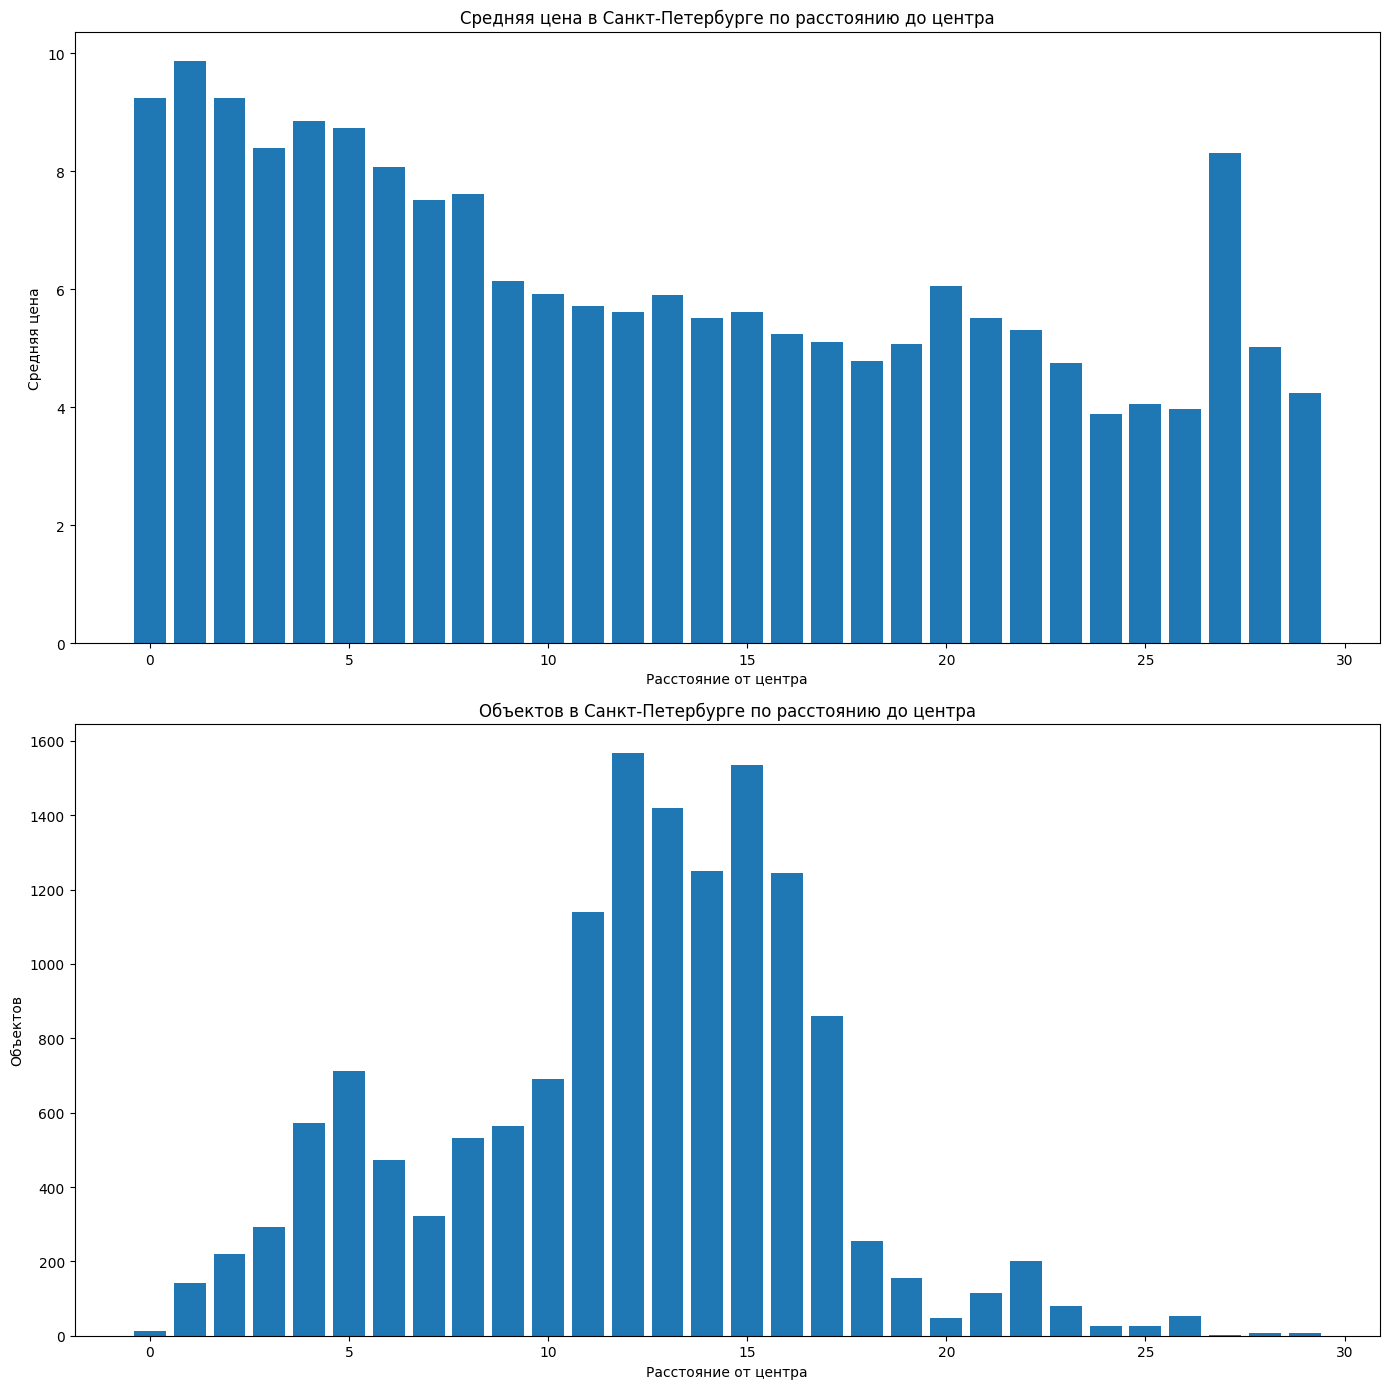

In [72]:
fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(2, 1, 1)
ax1 = plt.bar(mean_spb.index, mean_spb['mean'])
plt.title('Средняя цена в Санкт-Петербурге по расстоянию до центра')
plt.ylabel('Средняя цена')
plt.xlabel('Расстояние от центра')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = plt.bar(mean_spb.index, mean_spb['count'])
plt.title('Объектов в Санкт-Петербурге по расстоянию до центра')
plt.ylabel('Объектов')
plt.xlabel('Расстояние от центра')
plt.tight_layout()
plt.show()

Чем дальше от центра, тем ниже средняя цена. При этом количество объектов увеличивается на расстоянии до 15 километров от центра. При дальнейшем удалении от центра количество продаваемых объектов резко снижается.  
По средней цене есть всплеск на 27 км: там продается всего два объекта, и высокая цена любого из них приводит к завышению средней цены.

**Вывод:**  
1.	Наибольшее количество выставленных на продажу объектов имеют площадь 30-64 кв.м.
Количество объектов площадью до 30 кв.м. и более 100 кв.м. незначительно относительно общего числа.
2.	Наибольшее количество выставленных на продажу объектов имеют жилую площадь 16-20 кв.м. или 26-30 кв.м.  Количество объектов с жилой площадью до 16 кв.м. и более 56 кв.м. незначительно относительно общего числа.
3.	Многие объекты имеют кухни стандартных площадей. Наибольшее количество стандартных площадей кухонь приходится на диапазон 5-15 кв.м.   
4.	Наибольшее количество выставленных на продажу объектов имеют цену 2-7 млн. Пик приходится на диапазон 3.0-4.6 млн.  
Количество объектов ценой свыше 10 млн. незначительно относительно общего числа.  
5.	Больше всего опубликовано объявлений о продаже однокомнатных и двухкомнатных квартир - 7600-7900. Несколько меньше объявлений о трёхкомнатных квартирах - 5300. Количество объявлений о продаже пяти- и более комнатных квартир незначительно.
6.	Больше всего опубликовано объявлений о продаже квартир с высотой потолка 2.5-2.8 м - 3000-7000 объявлений для каждой высоты. Пик приходится на высоту потолков 2.6 м - около 7000. Количество объявлений о продаже квартир с высотой свыше 2.8 м незначительно.
7.	Чаще всего публикуются объявления о продаже квартир, расположенных на 1-5 этажах. Это обусловлено большим количеством 5-ти этажных жилых зданий в Санкт-Петербурге.  
8.	Количество объявлений о продаже квартир, расположенных на первом и последнем этажах примерно одинаково - около 2500 объявлений для того и другого. Количество объявлений о продаже квартир, расположенных на других этажах - около 16000.  
9.	Наибольшее количество объявлений - о продаже квартир в пятиэтажных (около 5500 объявлений) и девятиэтажных (около 3500 объявлений) домах.  
10.	Наибольшее количество объектов, о продаже которых опубликованы объявления, расположены на расстоянии 5000-16000 м от центра. Пик приходится на диапазон 11000-16000 м.  
11.	Наибольшее количество объектов, о продаже которых опубликованы объявления, расположены на расстоянии 11000-56000 м от аэропорта. Пик приходится на диапазон 16000-18000 м.  
12.	Чаще всего продаваемые объекты расположены на расстоянии 0-750 метров от парка. Пик приходится на диапазон 400-500 метров. Количество объявлений о продаже объектов, расположенных на расстоянии свыше 1000 метров от парка, незначительно.  
13.	Чаще объявления публикуются в будние дни. Наибольшее количество объявлений публикуется во вторник и среду - свыше 3500 объявлений в каждый из дней.  
14.	Меньше всего объявлений подается в середине года (май-сентябрь) и в декабре.  
15.	Большинство объявлений снимается через 1-100 дней после публикации. Число объявлений, снятых через 800 и более дней, незначительно по отношению к общему количеству. Смещение среднего (177) относительно медианы (93) свидетельствует о наличие выбросов в большую сторону.  
16.	С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены. Для объектов с площадью свыше 100 кв.м. рассеивание столь велико, что зависимость прослеживается слабо.   
Минимальные значения цены (около 0,6 млн.) в основном имеют место для объектов, площадью меньше 70 кв.м., максимальные достигают 16 млн. для 45-140 кв.м.  
17.	Для большинства объектов с жилой площадью до 22 кв.м. цена не превышает 7.5 млн.  
Для большинства объектов с жилой площадью 22-50 кв.м. не превышает 10 млн.  
С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены.  
18.	Большинство объектов находится в диапазонах:
- по площади кухни - до 17 кв.м.;
- по цене - до 10 млн.

    При площади кухни свыше 20 кв.м. зависимость цены от данного параметра не прослеживается.  

    В целом, площадь кухни в меньшей степени влияет на цену объекта, нежели жилая и общая площади.  
19.	Прослеживается линейная зависимость средней цены объекта от количества комнат: средняя цена увеличивается с 3.78 млн за однокомнатную до 13.87 за семикомнатную.  
20.	Наименьшая средняя цена наблюдается у объектов, расположенных на первом этаже, - 4.29 млн. Для последнего этажа средняя цена - 4.87 млн. Наибольшую среднюю цену имеют объекты класса "Другое" - 5.46 млн.  
21.	Наименьшую среднюю цену имеют объекты, объявления о которых опубликованы во вторник (5.17 млн), субботу (5.21) и воскресенье (5.15 млн). Средняя цена объектов, объявления о которых опубликованы в другие дни, колеблется в диапазоне 5.26-5.28 млн.  
22.	Наибольшую среднюю цену имеют объекты, объявления о которых опубликованы в апреле (5.40 млн). Наименьшую - в мае (5.06 млн) и июне (5.00). В остальные месяцы медиана цены колеблется в диапазоне 5.19-5.30 млн.
В целом, во второй половине года средняя цена выше, нежели в первой.  
23.	В период 2014-2018 средняя цена объектов снизилась с 7.10 до 5.12 млн. К 2019 поднялась до 5.54 млн.  
24.	Выявлена прямая корреляция следующих параметров:  
- количество комнат/общая площадь - 0,80;
- цена/общая площадь - 0,75;
- цена/количество комнат - 0,47;  

    Обратная корреляция выявлена для пары цена/расстояние до центра - минус 0,36.  
    Для остальных пар величина корреляции незначительна.  
25.	В десятку населенных пунктов с наибольшим количеством объявлений о продаже недвижимости входят следующие:
- Санкт-Петербург (14563);
- Мурино (562);
- Кудрово (451);
- Шушары (436);
- Всеволожск (390);
- Пушкин (356);
- Колпино (337);
- Парголово (322);
- Гатчина (306);
- Выборг (235).  

По средней цене квадратного метра лидерами являются:
- Санкт-Петербург (108011);
- Пушкин (101858);
- Кудрово (95150);
- Парголово (90448);
- Мурино (85442);
- Шушары (78405);
- Колпино (75332);
- Гатчина (68797);
- Всеволожск (67200);
- Выборг (58075).  
26. Чем дальше от центра, тем ниже средняя цена. При этом в Санкт-Петербурге количество объектов увеличивается на расстоянии до 15 километров от центра. При дальнейшем удалении от центра количество продаваемых объектов резко снижается.  
По средней цене есть всплеск на 27 км: там продается всего два объекта, и высокая цена любого из них приводит к завышению средней цены.


## Общий вывод
<a id="final"></a>

**Общая информация**  
1. В таблице 23699 строк и 22 столбца. Данные имеют типы "int64", "float64", "object" и "bool". Для обработки таблицы требуется 8.1 MB памяти.
2. В столбце "last_price" максимальное значение (763000000) в 112 раз превышает значение третьей квартили (6800000), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
3. В столбце "total_area" максимальное значение (900) в 13 раз превышает значение третьей квартили (69,9), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
4. В столбце "ceiling_height" (высота потолков) присутствуют необъяснимо высокие значения: максимальное - 100. Причиной может быть как небрежность продавца при составлении объявления, так и технический сбой.
5. В столбце "locality_name" присутствуют неявные дубли.  

**Предобработка данных**  
1. Пропущенные значения "ceiling_height" (высота потолка), "living_area" (жилая площадь) и "kitchen_area" (площадь кухни) заменены медианами соответствующих параметров, рассчитанными в зависимости от общей площади и количества комнат.    
2. Пропущенные значения "balcony", "is_apartment", "parks_around3000", "ponds_around3000" заменены на "0".  
3. Пропущенные значения "airports_nearest" (расстояние до ближайшего аэропорта в метрах) заменены медианами, рассчитанными в зависимости от названия населенного пункта. Оставшиеся пропуски оставлены без изменений.  
4. Обработаны пропуски и выбивающиеся значения "ceiling_height" (высота потолка), "floors_total" (всего этажей), "balcony" (количество балконов).
5. Необработанные пропуски и выбивающиеся значения "ceiling_height", "balcony", "floors_total",  "living_area" и "kitchen_area" заменены на "-1".
6. Удалены выбросы "last_price" (цена на момент снятия с публикации), "total_area" (общая площадь квартиры), "rooms" (количество комнат).
7. В результате предобработки удалено 5.46% строк.  
8. Рассчитаны и добавлены в датафрейм:  
- средняя цена квадратного метра ("price_m");  
- дата публикации ("date_exposition");  
- день недели публикации ("dayofweek");  
- месяц публикации ("month");  
- год публикации ("year");  
- классификация этажей ("floor_class");  
- расстояние до центра города в километрах ("cityCenters_nearest_km").  

**Расчет и добавление в датафрейм дополнительных параметров**  
Рассчитаны и добавлены в датафрейм следующие параметры:  
- средняя цена квадратного метра ("price_m");
- Дата публикации ("date_exposition");
- День недели публикации ("dayofweek");
- Месяц публикации ("month");
- Год публикации ("year");
- Классификация этажей ("floor_class").  

**Исследовательский анализ данных**  
1. Наибольшее количество выставленных на продажу объектов имеют цену 2-7 млн. Пик приходится на диапазон 3.0-4.6 млн.  Количество объектов ценой свыше 10 млн. незначительно относительно общего числа.
2. Наибольшее количество объектов, о продаже которых опубликованы объявления, расположены на расстоянии 5000-16000 м от центра. Пик приходится на диапазон 11000-16000 м.  
3. С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены. Для объектов с площадью свыше 100 кв.м. рассеивание столь велико, что зависимость прослеживается слабо.  
Минимальные значения цены (около 0,6 млн.) в основном имеют место для объектов, площадью меньше 70 кв.м., максимальные достигают 16 млн. для 45-140 кв.м.
4. Для большинства объектов с жилой площадью до 22 кв.м. цена не превышает 7.5 млн.  
Для большинства объектов с жилой площадью 22-50 кв.м. не превышает 10 млн.  
С увеличением площади объекта цена в целом возрастает, увеличивается степень рассеивания значений цены.  
5. Большинство объектов находится в диапазонах:
- по площади кухни - до 17 кв.м.;
- по цене - до 10 млн.

    При площади кухни свыше 20 кв.м. зависимость цены от данного параметра не прослеживается.  

    В целом, площадь кухни в меньшей степени влияет на цену объекта, нежели жилая и общая площади.  
6. Прослеживается линейная зависимость средней цены объекта от количества комнат: средняя цена увеличивается с 3.78 млн за однокомнатную до 13.87 за семикомнатную.  
7. Наименьшая средняя цена наблюдается у объектов, расположенных на первом этаже, - 4.29 млн. Для последнего этажа средняя цена - 4.87 млн. Наибольшую среднюю цену имеют объекты класса "Другое" - 5.46 млн.  
8.	В период 2014-2018 средняя цена объектов снизилась с 7.10 до 5.12 млн. К 2019 поднялась до 5.54 млн.  
9.	Выявлена прямая корреляция следующих параметров:  
- количество комнат/общая площадь - 0,80;
- цена/общая площадь - 0,75;
- цена/количество комнат - 0,47;  

    Обратная корреляция выявлена для пары цена/расстояние до центра - минус 0,36.  
    Для остальных пар величина корреляции незначительна.  
10.	В десятку населенных пунктов с наибольшим количеством объявлений о продаже недвижимости входят следующие:
- Санкт-Петербург (14563);
- Мурино (562);
- Кудрово (451);
- Шушары (436);
- Всеволожск (390);
- Пушкин (356);
- Колпино (337);
- Парголово (322);
- Гатчина (306);
- Выборг (235).  

По средней цене квадратного метра лидерами являются:
- Санкт-Петербург (108011);
- Пушкин (101858);
- Кудрово (95150);
- Парголово (90448);
- Мурино (85442);
- Шушары (78405);
- Колпино (75332);
- Гатчина (68797);
- Всеволожск (67200);
- Выборг (58075).  
11. Чем дальше от центра, тем ниже средняя цена. При этом в Санкт-Петербурге количество объектов увеличивается на расстоянии до 15 километров от центра. При дальнейшем удалении от центра количество продаваемых объектов резко снижается.  